In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# **DATA UPLOAD**


In [2]:
data = pd.read_csv("MI.data", sep=',',header = None)
column_names = [
    'ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT',
    'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04',
    'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
    'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
new_column_names = {i: col for i, col in enumerate(column_names)}
new_column_names
data.rename(columns=new_column_names, inplace = True)
data.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0


# **FEATURES AND TARGETS DICTIONARY**

In [3]:
# Table with quick description of every feature/target for a better understanding
"""
-------------------------------------
First word of every category:
Who got the information?
- PD = Patient_Doctor Interview
- ECG = Emergency Cardiology Team
- ICU = Intensive Care Unit

- T = Targets (just last 12 features)

Last word of every category:
How is categorized every feature in general (every case should be analyzed separately)
- Count: once, twice, three times...
- Duration: days, weeks, months, years...
- Category: classes, stages, types...
- YN: Yes or No
- Time: hours, days...
- XLevel: X units (continous)
-------------------------------------
"""
data_desc = data.copy()
# Rename of the column headers for better understanding
column_names_desc = [
    'ID', 'Age', 'Sex', 'PD_MyocardialInfarction_Count','PD_ChestPain_Duration', 'PD_ChestPain_Category',
    'PD_CoronaryHeartDisease_Category', 'PD_HeredityHeartDisease_YN', 'PD_Hyperthesion_Category',
    'PD_SymptomaticHyperthesion_YN', 'PD_Hyperthesion_Duration', 'PD_HeartFailure_Category', 'PD_Arrhythmia1_YN',
    'PD_Arrhythmia2_YN', 'PD_Arrhythmia3_YN','PD_Arrhythmia4_YN', 'PD_Arrhythmia5_YN', 'PD_Arrhythmia6_YN',
    'PD_Arrhythmia7_YN', 'PD_HeartBlock1_YN', 'PD_HeartBlock2_YN', 'PD_HeartBlock3_YN', 'PD_HeartBlock4_YN',
    'PD_HeartBlock5_YN', 'PD_HeartBlock6_YN', 'PD_HeartBlock7_YN', 'PD_Diabetes_YN', 'PD_Obesity_YN',
    'PD_HighThyroidHormone_YN', 'PD_ChronicBronchitis_YN', 'PD_BronchitisObstructive_YN', 'PD_Asthma_YN',
    'PD_ChronicPneumonia_YN', 'PD_PulmonaryTuberculosis_YN', 'ECT_SystolicBloodPressure_mmHgLevel',
    'ECT_DiastolicBloodPressure_mmHgLevel', 'ICU_SystolicBloodPressure_mmHgLevel', 'ICU_DiastolicBloodPressure_mmHgLevel',
    'ICU_PulmonaryEdema_YN', 'ICU_CardiogenicSchock_YN', 'ICU_Arrhythmia1_YN', 'ICU_Arrhythmia2_YN',
    'ICU_Arrhythmia3_YN', 'ICU_Arrhythmia4_YN', 'ICU_MILocalization1_Category', 'ICU_MILocalization2_Category',
    'ICU_MILocalization3_Category', 'ICU_MILocalization4_Category', 'ICU_MILocalization5_YN', 'ECT_HeartRhytm1_YN',
    'ECT_HeartRhytm2_YN', 'ECT_HeartRhytm3_YN', 'ECT_HeartRhytm4_YN', 'ECT_HeartRhytm5_YN', 'ECT_HeartRhytm6_YN',
    'ECT_Arrhythmia1_YN', 'ECT_Arrhythmia2_YN', 'ECT_Arrhythmia3_YN', 'ECT_Arrhythmia4_YN', 'ECT_Arrhythmia5_YN',
    'ECT_Arrhythmia6_YN', 'ECT_Arrhythmia7_YN', 'ECT_Arrhythmia8_YN','ECT_Arrhythmia9_YN', 'ECT_HeartBlock1_YN',
    'ECT_HeartBlock2_YN', 'ECT_HeartBlock3_YN', 'ECT_HeartBlock4_YN', 'ECT_HeartBlock5_YN', 'ECT_HeartBlock6_YN',
    'ECT_HeartBlock7_YN', 'ECT_HeartBlock8_YN', 'ECT_HeartBlock9_YN', 'ECT_HeartBlock10_YN', 'ECT_HeartBlock11_YN',
    'ICU_Drug1_Celasium750k_YN', 'ICU_Drug2_Celasium1m_YN', 'ICU_Drug3_Celasium3m_YN', 'ICU_Drug4_Streptase_YN',
    'ICU_Drug5_Celasium500k_YN', 'ICU_Drug6_Celasium250k_YN', 'ICU_Drug7_Celasium1p5m_YN', 'ICU_Lab1_LowPotassium_YN',
    'ICU_Lab2_Potassium_mmol/LLevel', 'ICU_Lab3_HighSodium_YN', 'ICU_Lab4_Sodium_mmol/LLevel', 'ICU_Lab5_EnzymeAIAT_IU/LLevel',
    'ICU_Lab6_EnzymeASAT_IU/LLevel', 'ICU_Lab7_EnzymeCPK_IU/LLevel', 'ICU_Lab8_WhiteBloodCells_BillionsperLiterLevel',
    'ICU_Lab9_ESRate_mm/hourLevel', 'ICU_HeartAttack_Time', 'ICU_RelapsePain_1stHour_Count', 'ICU_RelapsePain_Day2_Count',
    'ICU_RelapsePain_Day3_Count', 'ECT_Drug1_Opioid_YN', 'ECT_Drug2_NSAIDs_YN', 'ECT_Drug3_Lidocaine_YN',
    'ICU_Drug1_LiquidNitrates_YN', 'ICU_Drug2_Opioid_1stHour_Count', 'ICU_Drug2_Opioid_Day2_Count',
    'ICU_Drug2_Opioid_Day3_Count', 'ICU_Drug3_NSAIDs_1stHour_Count', 'ICU_Drug3_NSAIDs_Day2_Count',
    'ICU_Drug3_NSAIDs_Day3_Count', 'ICU_Drug4_Lidocaine_YN', 'ICU_Drug5_BetaBlockers_YN', 'ICU_Drug6_CalciumBlockers_YN',
    'ICU_Drug7_Anticoagulants_YN', 'ICU_Drug8_Acetylsalicylic_YN', 'ICU_DrugTiclid9_YN', 'ICU_DrugTrental10_YN',
    'T_AtrialFibrillation_YN', 'T_SPTachycardia_YN', 'T_VentricularTachycardia_YN', 'T_VentricularFibrillation_YN',
    'T_3rdDegreeAVBlock_YN', 'T_PulmonaryEdema_YN', 'T_MyocardialRupture_YN', 'T_DresslerSyndrome_YN',
    'T_ChronicHeartFailure_YN', 'T_RelapseIM_YN', 'T_PostAngina_YN', 'T_Lethal_Outcomes']

column_mapping = dict(zip(column_names, column_names_desc))
data_desc.rename(columns=column_mapping, inplace=True)
column_mapping = pd.DataFrame({'Old_Column_Name': column_names, 'New_Column_Name': column_names_desc})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
column_mapping

,Old_Column_Name,New_Column_Name
0,ID,ID
1,AGE,Age
2,SEX,Sex
3,INF_ANAM,PD_MyocardialInfarction_Count
4,STENOK_AN,PD_ChestPain_Duration
5,FK_STENOK,PD_ChestPain_Category
6,IBS_POST,PD_CoronaryHeartDisease_Category
7,IBS_NASL,PD_HeredityHeartDisease_YN
8,GB,PD_Hyperthesion_Category
9,SIM_GIPERT,PD_SymptomaticHyperthesion_YN


# **DATA DESCRIPTION**

Data Types

In [4]:
# Check all column data types
data_types = data.dtypes
data_types_count = data_types.value_counts()

# Print count of data types
print(data_types_count)

#Print all the column data types
for column, dtype in data_types.items():
    print(f"{column}': '{dtype}")

object    110
int64      14
Name: count, dtype: int64
ID': 'int64
AGE': 'object
SEX': 'int64
INF_ANAM': 'object
STENOK_AN': 'object
FK_STENOK': 'object
IBS_POST': 'object
IBS_NASL': 'object
GB': 'object
SIM_GIPERT': 'object
DLIT_AG': 'object
ZSN_A': 'object
nr_11': 'object
nr_01': 'object
nr_02': 'object
nr_03': 'object
nr_04': 'object
nr_07': 'object
nr_08': 'object
np_01': 'object
np_04': 'object
np_05': 'object
np_07': 'object
np_08': 'object
np_09': 'object
np_10': 'object
endocr_01': 'object
endocr_02': 'object
endocr_03': 'object
zab_leg_01': 'object
zab_leg_02': 'object
zab_leg_03': 'object
zab_leg_04': 'object
zab_leg_06': 'object
S_AD_KBRIG': 'object
D_AD_KBRIG': 'object
S_AD_ORIT': 'object
D_AD_ORIT': 'object
O_L_POST': 'object
K_SH_POST': 'object
MP_TP_POST': 'object
SVT_POST': 'object
GT_POST': 'object
FIB_G_POST': 'object
ant_im': 'object
lat_im': 'object
inf_im': 'object
post_im': 'object
IM_PG_P': 'object
ritm_ecg_p_01': 'object
ritm_ecg_p_02': 'object
ritm_ecg_p_04': 'o

In [5]:
# Changing all data to float type
data = data.apply(pd.to_numeric, errors='coerce')
data = data.astype(float)

# Print count of new data types
data_types_new = data.dtypes
data_types_count_new = data_types_new.value_counts()
print(data_types_count_new)

#Print all the column data types
for column, dtype in data_types_new.items():
    print(f"{column}': '{dtype}")

float64    124
Name: count, dtype: int64
ID': 'float64
AGE': 'float64
SEX': 'float64
INF_ANAM': 'float64
STENOK_AN': 'float64
FK_STENOK': 'float64
IBS_POST': 'float64
IBS_NASL': 'float64
GB': 'float64
SIM_GIPERT': 'float64
DLIT_AG': 'float64
ZSN_A': 'float64
nr_11': 'float64
nr_01': 'float64
nr_02': 'float64
nr_03': 'float64
nr_04': 'float64
nr_07': 'float64
nr_08': 'float64
np_01': 'float64
np_04': 'float64
np_05': 'float64
np_07': 'float64
np_08': 'float64
np_09': 'float64
np_10': 'float64
endocr_01': 'float64
endocr_02': 'float64
endocr_03': 'float64
zab_leg_01': 'float64
zab_leg_02': 'float64
zab_leg_03': 'float64
zab_leg_04': 'float64
zab_leg_06': 'float64
S_AD_KBRIG': 'float64
D_AD_KBRIG': 'float64
S_AD_ORIT': 'float64
D_AD_ORIT': 'float64
O_L_POST': 'float64
K_SH_POST': 'float64
MP_TP_POST': 'float64
SVT_POST': 'float64
GT_POST': 'float64
FIB_G_POST': 'float64
ant_im': 'float64
lat_im': 'float64
inf_im': 'float64
post_im': 'float64
IM_PG_P': 'float64
ritm_ecg_p_01': 'float64
rit

Null Values

In [6]:
data_null = data.isnull().values.any() # there are null values
data_NA = data.isna().values.any() # there are NA values
data.replace('?', pd.NA, inplace=True) # replace question marks with NA

data_nulls_sum = data.isnull().sum() # check how many null values are in every feature
print(data_nulls_sum)

ID                  0
AGE                 8
SEX                 0
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im    

## Get rid of collumns with too many missing values

In [7]:
data.drop(['IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','KFK_BLOOD'],axis = 1, inplace = True)

## Change unranked categorical data

In [8]:
one_hot_data_angina_pectoris = pd.get_dummies(data['STENOK_AN'].astype(str))
column_mapping = {
    '0.0': 'Angina never',
    '1.0': 'Angina during last year',
    '2.0': 'Angina one year ago',
    '3.0': 'Angina two years ago',
    '4.0': 'Angina three years ago',
    '5.0': 'Angina 4-5 years ago',
    '6.0': 'Angina >5 years ago',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_angina_pectoris.rename(columns=column_mapping)
one_hot_data.drop(['nan'],axis = 1,inplace = True)
data.drop(['STENOK_AN'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [9]:
one_hot_data_heart_failure = pd.get_dummies(data['ZSN_A'].astype(str))
column_mapping = {
    '0.0': 'no heart failure',
    '1.0': 'stage I heart failure',
    '2.0': 'stage II heart failure right vs',
    '3.0': 'stage II heart failure left vs',
    '4.0': 'stage IIB heart failure',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_heart_failure.rename(columns=column_mapping)
one_hot_data.drop(['nan'],axis = 1,inplace = True)

data.drop(['ZSN_A'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [10]:
one_hot_data_anterior_MI = pd.get_dummies(data['ant_im'].astype(str))
column_mapping = {
    '0.0': 'no anterior MI',
    '1.0': 'anterior no QRS change',
    '2.0': 'anterior QR',
    '3.0': 'anterior Qr',
    '4.0': 'anterior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_anterior_MI.rename(columns=column_mapping)
one_hot_data.drop(['nan'],axis = 1,inplace = True)

data.drop(['ant_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [11]:
one_hot_data_lateral_MI = pd.get_dummies(data['lat_im'].astype(str))
column_mapping = {
    '0.0': 'no lateral MI',
    '1.0': 'lateral no QRS change',
    '2.0': 'lateral QR',
    '3.0': 'lateral Qr',
    '4.0': 'lateral QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_lateral_MI.rename(columns=column_mapping)
one_hot_data.drop(['nan'],axis = 1,inplace = True)

data.drop(['lat_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [12]:
one_hot_data_inferior_MI = pd.get_dummies(data['inf_im'].astype(str))
column_mapping = {
    '0.0': 'no inferior MI',
    '1.0': 'inferior no QRS change',
    '2.0': 'inferior QR',
    '3.0': 'inferior Qr',
    '4.0': 'inferior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_inferior_MI.rename(columns=column_mapping)
one_hot_data.drop(['nan'],axis = 1,inplace = True)

data.drop(['inf_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [13]:
one_hot_data_posterior_MI = pd.get_dummies(data['post_im'].astype(str))
column_mapping = {
    '0.0': 'no posterior MI',
    '1.0': 'posterior no QRS change',
    '2.0': 'posterior QR',
    '3.0': 'posterior Qr',
    '4.0': 'posterior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_posterior_MI.rename(columns=column_mapping)
one_hot_data.drop(['nan'],axis = 1,inplace = True)

data.drop(['post_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

## **Exploratory Data Analysis**

**AGE**

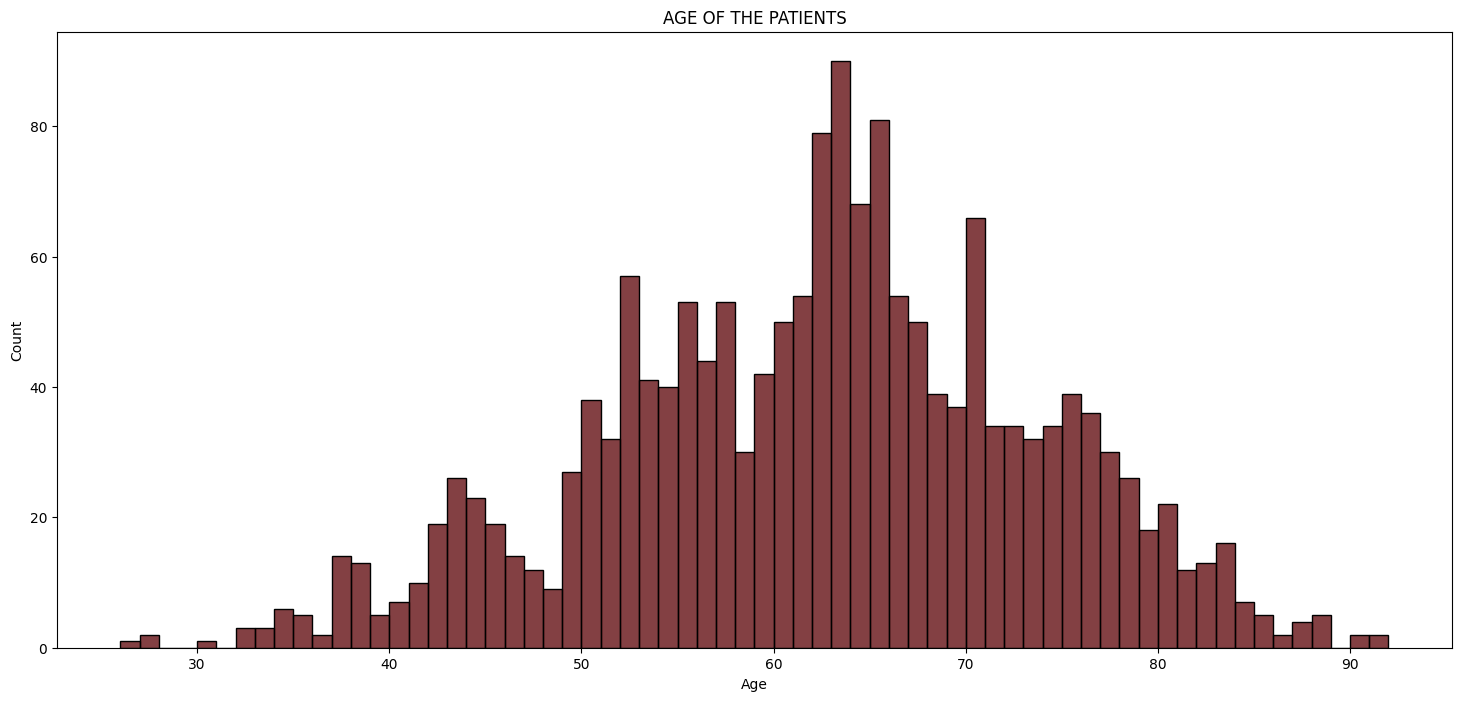

In [14]:
age_count = data['AGE'].value_counts().sort_index()
sorted_ages = data['AGE'].dropna().sort_values() #had to sort as they were unordered
plt.figure(figsize=(18,8)) #just making sure we have a big enough plot to display all ages clearly
sns.histplot(sorted_ages, binwidth = 1, color = "#590004")
plt.title("AGE OF THE PATIENTS")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**SEX**

SEX
Male      1065
Female     635
Name: count, dtype: int64


Text(0, 0.5, 'Count')

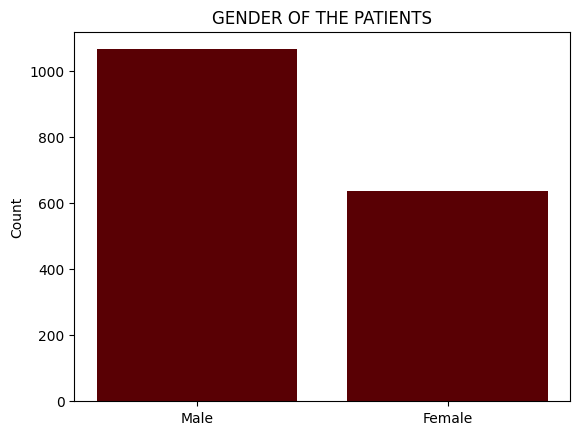

In [15]:
gender_count = data['SEX'].value_counts()
gender_count_map = gender_count.rename({0: 'Female', 1: 'Male'})
print(gender_count_map)

gender_categories = ['Male', 'Female']
plt.bar(gender_categories, gender_count, color = "#590004")
plt.title("GENDER OF THE PATIENTS")
plt.ylabel("Count")

**Previous Myocardial Infarctions**

INF_ANAM
0.0    1060
1.0     410
2.0     147
3.0      79
Name: count, dtype: int64


Text(0.5, 0, 'Number of Previous Myocardial Infarctions')

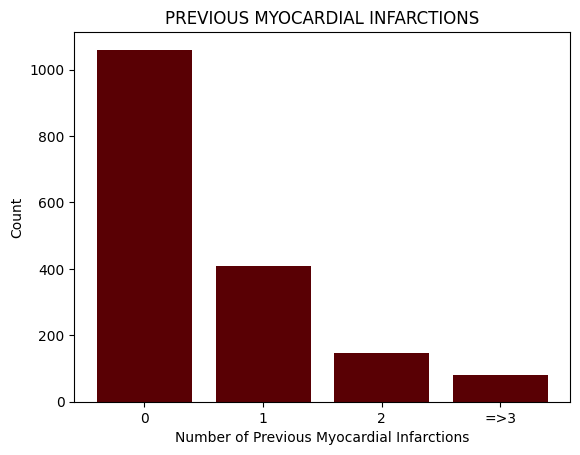

In [16]:

myo_infar_count = data['INF_ANAM'].value_counts()
myo_infar_map = myo_infar_count.rename({'0': '0', '1': '1', '2': '2', '3': '=>3'})
print(myo_infar_map)

myoinfar_categories = ['0', '1', '2', '=>3']
plt.bar(myoinfar_categories, myo_infar_count, color = "#590004")
plt.title("PREVIOUS MYOCARDIAL INFARCTIONS")
plt.ylabel("Count")
plt.xlabel("Number of Previous Myocardial Infarctions")

**Coronary Heard Disease**

IBS_POST
2.0    683
1.0    548
0.0    418
Name: count, dtype: int64


Text(0, 0.5, 'Count')

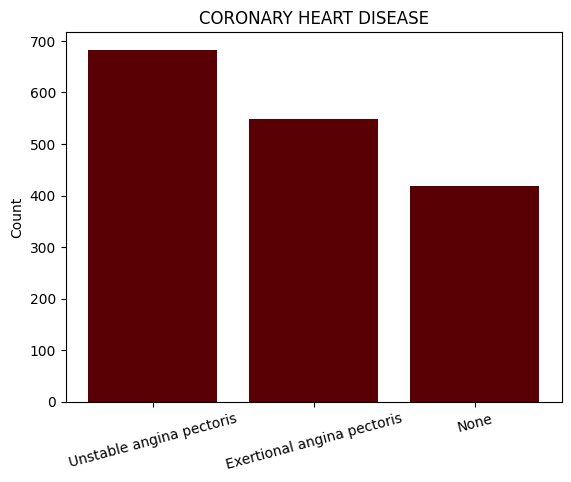

In [17]:
chd_count = data['IBS_POST'].value_counts()
chd_count_map = chd_count.rename({'0': 'None', "1": 'Exertional angina pectoris', '2': 'Unstable angina pectoris'})
print(chd_count_map)

chd_categories = ['Unstable angina pectoris', 'Exertional angina pectoris', 'None']
plt.bar(chd_categories, chd_count, color = "#590004")
plt.xticks(rotation = 15)
plt.title("CORONARY HEART DISEASE")
plt.ylabel("Count")

**Heredity**

In [18]:
heredity_count = data['IBS_NASL'].value_counts()
heredity_count_map = heredity_count.rename({'0': 'No', "1": 'Yes'})
print(heredity_count_map)

heredity_categories = ['No', 'Yes']
plt.bar(heredity_categories, heredity_count, color = "#590004")
plt.title("HEREDITY OF CHD")
plt.ylabel("Count")
#many empty values here

KeyError: 'IBS_NASL'

**Diabetes**

endocr_01
0.0    1461
1.0     228
Name: count, dtype: int64


Text(0, 0.5, 'Count')

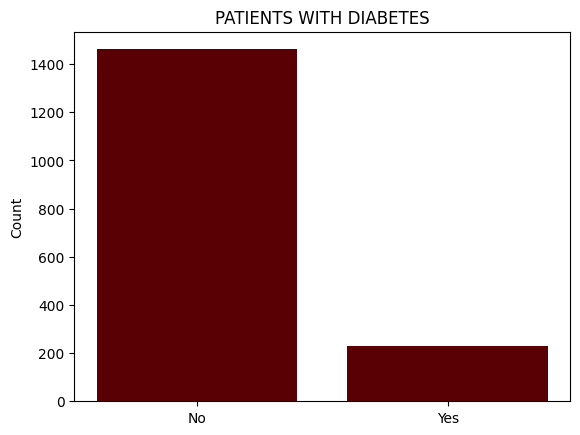

In [ ]:
diabetes_count = data['endocr_01'].value_counts()
diabetes_count_map = diabetes_count.rename({'0': 'No', "1": 'Yes'})
print(diabetes_count_map)

diabetes_categories = ['No', 'Yes']
plt.bar(diabetes_categories, diabetes_count, color = "#590004")
plt.title("PATIENTS WITH DIABETES")
plt.ylabel("Count")

**Obesity**

endocr_02
0.0    1648
1.0      42
Name: count, dtype: int64


Text(0, 0.5, 'Count')

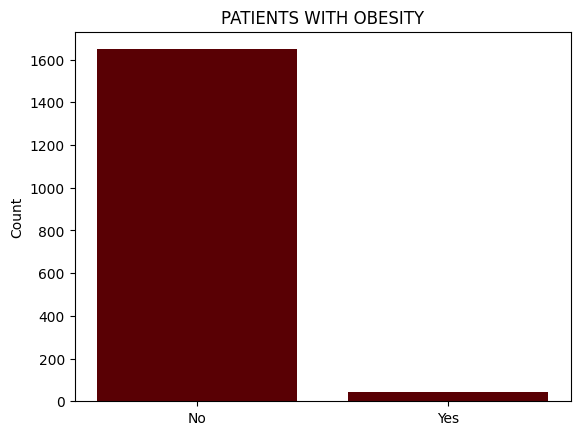

In [ ]:
obesity_count = data['endocr_02'].value_counts()
obesity_count_map = obesity_count.rename({'0': 'No', "1": 'Yes'})
print(obesity_count_map)

obesity_categories = ['No', 'Yes']
plt.bar(obesity_categories, obesity_count, color = "#590004")
plt.title("PATIENTS WITH OBESITY")
plt.ylabel("Count")

**Administration of different drugs by ECT**

In [ ]:
drugs = [("Opiod", 'NA_KB'), ("NSAIDs", 'NOT_NA_KB'), ("Lidocaine", 'LID_KB'), ("Liquid Nitrates", 'LID_KB')] #####
cols = []
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        print(f"{drug} administered: {count.get(1, 0)}")
        print(f"{drug} not administered: {count.get(0, 0)}")
        cols.append(column_name)
        print('\n')
drug_emergency_cols = data[cols]
null_counts = drug_emergency_cols.isnull().all().sum()
print(null_counts) #in all cases some drug was administred

Opiod administered: 618
Opiod not administered: 425


NSAIDs administered: 701
NSAIDs not administered: 313


Lidocaine administered: 396
Lidocaine not administered: 627


Liquid Nitrates administered: 396
Liquid Nitrates not administered: 627


0


**Administrarion of different drugs in the ICU**

In [ ]:
drugs = [("opiod first hour", 'NA_R_1_n'), ("opiods second day", 'NA_R_2_n'), ("opiods third day", 'NA_R_3_n'), ("liquid nitrates", 'NITR_S'),
        ("NSAIDs first hours", "NOT_NA_1_n"), ("NSAIDs second day", 'NOT_NA_2_n'), ("NSAIDs third day", 'NOT_NA_3_n'), ("lidocaine", 'LID_S_n'), 
        ("beta-blockers", 'B_BLOK_S_n'), ("calcium channel blockers", 'ANT_CA_S_n'), ("anticoagulants", 'GEPAR_S_n'), ("acetylsalicylic", 'ASP_S_n'), 
         ("Ticlid", 'TIKL_S_n'), ("Trental", 'TRENT_S_n')]

#just counting if was administered or not - not how many times it was administered 
for drug, column_name in drugs:
    column = data[column_name].sort_values()
    count = column.value_counts()
    administered_count = np.sum(np.fromiter((count.get(i, 0) for i in range(1, 5)), dtype=int))  # Counting values greater than or equal to 1
    print(f"{drug} administered: {administered_count}")
    print(f"{drug} not administered: {count.get(0.0, 0)}")
    print('\n')

opiod first hour administered: 587
opiod first hour not administered: 1108


opiods second day administered: 118
opiods second day not administered: 1474


opiods third day administered: 76
opiods third day not administered: 1493


liquid nitrates administered: 195
liquid nitrates not administered: 1496


NSAIDs first hours administered: 453
NSAIDs first hours not administered: 1237


NSAIDs second day administered: 136
NSAIDs second day not administered: 1454


NSAIDs third day administered: 95
NSAIDs third day not administered: 1474


lidocaine administered: 479
lidocaine not administered: 1211


beta-blockers administered: 215
beta-blockers not administered: 1474


calcium channel blockers administered: 1125
calcium channel blockers not administered: 562


anticoagulants administered: 1203
anticoagulants not administered: 480


acetylsalicylic administered: 1252
acetylsalicylic not administered: 431


Ticlid administered: 30
Ticlid not administered: 1654


Trental administered: 341


In [ ]:
drugs = [("opiod first hour", 'NA_R_1_n'), ("opiods second day", 'NA_R_2_n'), ("opiods third day", 'NA_R_3_n'), ("liquid nitrates", 'NITR_S'),
        ("NSAIDs second day", 'NOT_NA_2_n'), ("NSAIDs third day", 'NOT_NA_3_n'), ("lidocaine", 'LID_S_n'), ("beta-blockers", 'B_BLOK_S_n'),
        ("calcium channel blockers", 'ANT_CA_S_n'), ("anticoagulants", 'GEPAR_S_n'), ("acetylsalicylic", 'ASP_S_n'), ("Ticlid", 'TRENT_S_n')]
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        if drug == "NSAIDs second day":
            #special case handling for this column
            print(f"administration of NSAIDs in first hours of hospital period: {data['NOT_NA_1_n'].value_counts()}")
            print('\n')
        print(f"{drug} administered: {count.get(1, 0)}")
        print(f"{drug} not administered: {count.get(0, 0)}")
        print('\n')

opiod first hour administered: 409
opiod first hour not administered: 1108


opiods second day administered: 87
opiods second day not administered: 1474


opiods third day administered: 60
opiods third day not administered: 1493


liquid nitrates administered: 195
liquid nitrates not administered: 1496


administration of NSAIDs in first hours of hospital period: NOT_NA_1_n
0.0    1237
1.0     376
2.0      53
3.0      17
4.0       7
Name: count, dtype: int64


NSAIDs second day administered: 95
NSAIDs second day not administered: 1454


NSAIDs third day administered: 57
NSAIDs third day not administered: 1474


lidocaine administered: 479
lidocaine not administered: 1211


beta-blockers administered: 215
beta-blockers not administered: 1474


calcium channel blockers administered: 1125
calcium channel blockers not administered: 562


anticoagulants administered: 1203
anticoagulants not administered: 480


acetylsalicylic administered: 1252
acetylsalicylic not administered: 431


Ticlid

#### distribution of target variables (without lethal outcome) ####

Counts for FIBR_PREDS:
FIBR_PREDS
0.0    1530
1.0     170
Name: count, dtype: int64
Counts for PREDS_TAH:
PREDS_TAH
0.0    1680
1.0      20
Name: count, dtype: int64
Counts for JELUD_TAH:
JELUD_TAH
0.0    1658
1.0      42
Name: count, dtype: int64
Counts for FIBR_JELUD:
FIBR_JELUD
0.0    1629
1.0      71
Name: count, dtype: int64
Counts for A_V_BLOK:
A_V_BLOK
0.0    1643
1.0      57
Name: count, dtype: int64
Counts for OTEK_LANC:
OTEK_LANC
0.0    1541
1.0     159
Name: count, dtype: int64
Counts for RAZRIV:
RAZRIV
0.0    1646
1.0      54
Name: count, dtype: int64
Counts for DRESSLER:
DRESSLER
0.0    1625
1.0      75
Name: count, dtype: int64
Counts for ZSN:
ZSN
0.0    1306
1.0     394
Name: count, dtype: int64
Counts for REC_IM:
REC_IM
0.0    1541
1.0     159
Name: count, dtype: int64
Counts for P_IM_STEN:
P_IM_STEN
0.0    1552
1.0     148
Name: count, dtype: int64


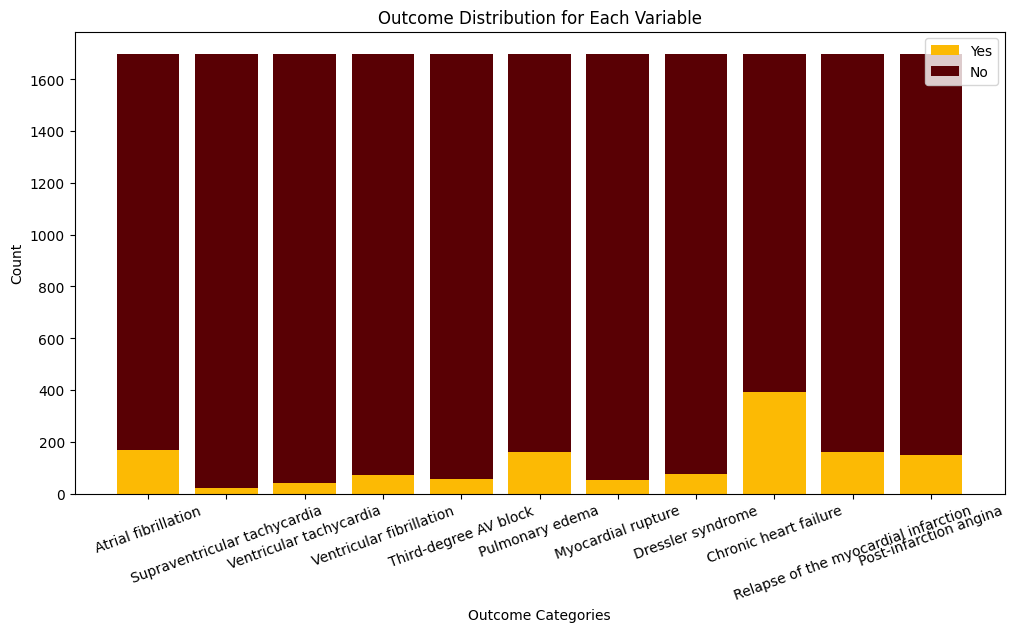

In [ ]:
outcome = data[['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']]

categories = ["Atrial fibrillation", "Supraventricular tachycardia", "Ventricular tachycardia", "Ventricular fibrillation", "Third-degree AV block", 
              "Pulmonary edema", "Myocardial rupture", "Dressler syndrome", "Chronic heart failure", "Relapse of the myocardial infarction", 
              "Post-infarction angina"]
for column in outcome.columns:
    print(f"Counts for {column}:")
    print(outcome[column].value_counts())
    
yes_counts = outcome.eq(1).sum()
no_counts = outcome.eq(0).sum()

plt.figure(figsize=(12, 6))
plt.bar(categories, yes_counts, label='Yes', color="#FCBA04")
plt.bar(categories, no_counts, bottom=yes_counts, label='No', color = "#590004")
plt.title("Outcome Distribution for Each Variable")
plt.xlabel("Outcome Categories")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.legend()
plt.show()

**Lethal outcome**

LET_IS
Alive                                   1429
Cardiogenic shock                        110
Pulmonary edema                           18
Myocardial rupture                        54
Progress of congestive heart failure      23
Thromboembolism                           12
Asystole                                  27
Ventricular fibrillation                  27
Name: count, dtype: int64


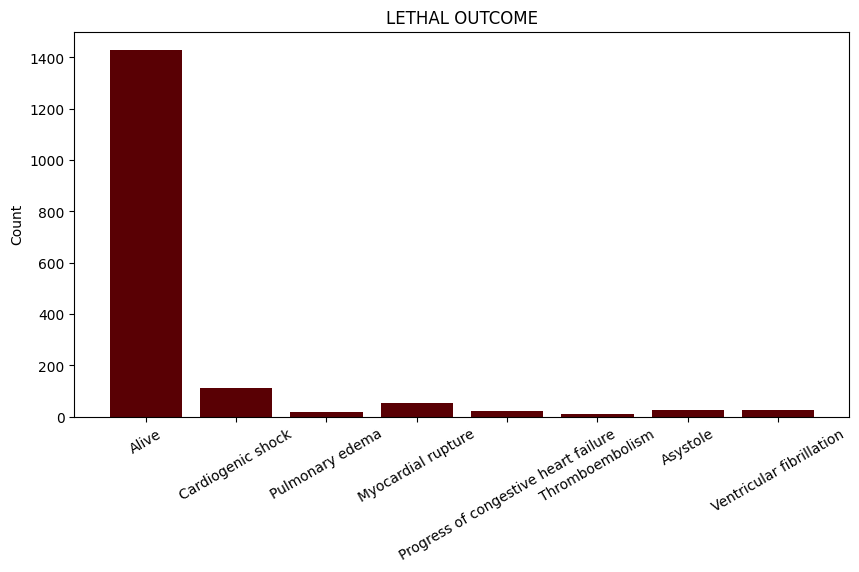

In [ ]:
outcome_count = data['LET_IS'].value_counts().sort_index()
outcome_count_map = outcome_count.rename({0: 'Alive', 1: 'Cardiogenic shock', 2: 'Pulmonary edema',
                                          3: 'Myocardial rupture', 4: 'Progress of congestive heart failure',
                                          5: 'Thromboembolism', 6: 'Asystole', 7: 'Ventricular fibrillation'}) #####
print(outcome_count_map)
outcome_categories = ['Alive', 'Cardiogenic shock', 'Pulmonary edema', 'Myocardial rupture', 'Progress of congestive heart failure',
                                'Thromboembolism', 'Asystole', 'Ventricular fibrillation']
plt.figure(figsize=(10, 5))
plt.bar(outcome_categories, outcome_count, color = "#590004")
plt.title("LETHAL OUTCOME")
plt.xticks(rotation = 30)
plt.ylabel("Count")
plt.show()

**Time elapsed from beginning of heart attack to the hospital**

TIME_B_S
2-4h      198
4-6h      360
4-6h      175
6-8h       87
8-12h      92
12-24h    151
>1d       141
>2d       101
>3d       269
Name: count, dtype: int64


Text(0, 0.5, 'Count')

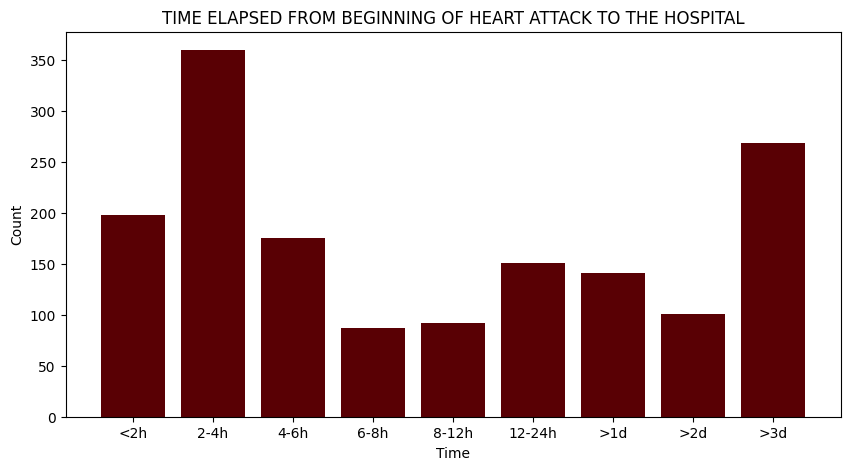

In [ ]:
time_count = data['TIME_B_S'].value_counts().sort_index() ####
time_count_map = time_count.rename({0: '< 2h', 1: '2-4h', 2: '4-6h',
                                          3: '4-6h', 4: '6-8h',
                                          5: '8-12h', 6: '12-24h', 7: '>1d', 8: '>2d', 9: '>3d'}) #####
print(time_count_map) #####

time_categories = ["<2h", "2-4h", "4-6h", "6-8h", "8-12h", "12-24h", ">1d", ">2d", ">3d"]
plt.figure(figsize=(10,5))
plt.bar(time_categories, time_count, color = "#590004")
plt.title("TIME ELAPSED FROM BEGINNING OF HEART ATTACK TO THE HOSPITAL")
plt.xlabel("Time")
plt.ylabel("Count")

## **Impute Missing values**

Since the proportion of missing values is high in some features, simple imputation methods (mean, median, mode) may not be appropriate as they can introduce bias and distort the distribution of the data. Instead, a more sophisticated imputation is chosen, KNN Imputer

In [ ]:
minimum_count_columns = data.count()[data.count() < 400].index.tolist()
print(minimum_count_columns)

['IBS_NASL', 'KFK_BLOOD']


Get rid of features with too few entries to start with

In [ ]:
minimum_count_columns = data.count()[data.count() > 400].index.tolist()
print(len(minimum_count_columns))
data = data[minimum_count_columns]
data_nulls_sum = data.isnull().sum() # check how many null values are in every feature

122


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

imputer = KNNImputer(n_neighbors=5)

# Iterate over features with missing values
for feature, count in data_nulls_sum.items():
    # Check if the feature has missing values
    if count > 0:
        # Impute missing values in the feature using KNNImputer
        data[feature] = imputer.fit_transform(data[[feature]])

# Save data with no missing values
data_imputed = data.copy()

# Check the accuracy of the imputer with cross validation
X = data_imputed.drop("LET_IS", axis=1)
y = data_imputed["LET_IS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model Training and Cross-Validation
rf_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores).round(3)
std_cv_score = np.std(cv_scores).round(3)
print("Cross-Validation Mean MSE:", mean_cv_score)
print("Cross-Validation Std Dev MSE:", std_cv_score)

Cross-Validation Mean MSE: 0.573
Cross-Validation Std Dev MSE: 0.191


In [ ]:
# Check if there are still null or NA values
data_null = data.isnull().values.any() # no null values
data_NA = data.isna().values.any() # no NA values
print(data_null)
print(data_NA)

False
False


Explained Variance Ratio: [5.95763901e-01 2.02163398e-01 7.29307057e-02 4.71814694e-02
 2.75556532e-02 1.65468920e-02 1.52049374e-02 5.31722712e-03
 4.02501956e-03 3.55672659e-03 2.71946648e-03 1.96419753e-03
 5.15711560e-04 3.80886915e-04 3.31090867e-04 2.67100887e-04
 2.50364188e-04 2.42299776e-04 2.27857059e-04 2.07232568e-04
 1.99050771e-04 1.89954748e-04 1.75808799e-04 1.44771931e-04
 1.31482248e-04 1.20054417e-04 1.11476793e-04 1.05205639e-04
 9.23288713e-05 8.69306285e-05 8.35969970e-05 7.34353541e-05
 7.07296825e-05 6.60678772e-05 6.34706229e-05 5.79237031e-05
 5.74065817e-05 5.62563135e-05 5.02101859e-05 4.81745447e-05
 4.60157522e-05 4.56899531e-05 4.18424662e-05 3.54564345e-05
 3.39420142e-05 2.95117984e-05 2.77566502e-05 2.60326789e-05
 2.37710360e-05 2.25248839e-05 2.06503530e-05 1.96049977e-05
 1.74150600e-05 1.70745842e-05 1.60024037e-05 1.52690360e-05
 1.38197845e-05 1.36992842e-05 1.22816259e-05 1.20704881e-05
 1.15765399e-05 1.08653948e-05 1.01475698e-05 9.47508378e-0

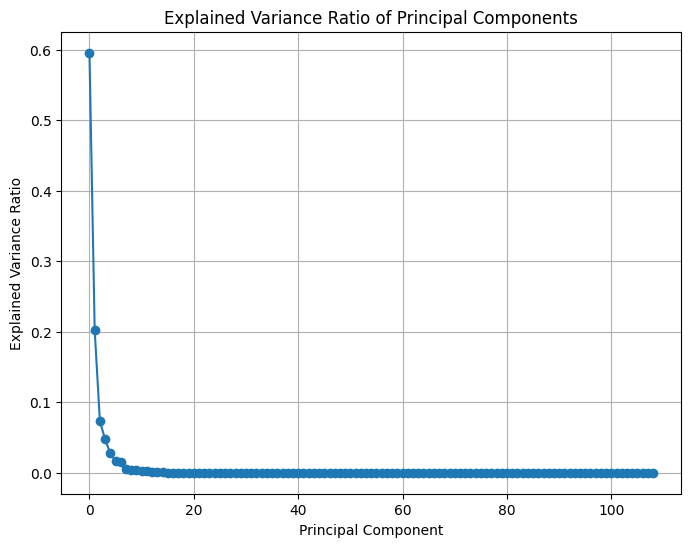

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exclude 'ID' column
data = data.drop(columns=['ID'])

# Separate features
X = data.drop(columns=['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 
                       'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'])

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

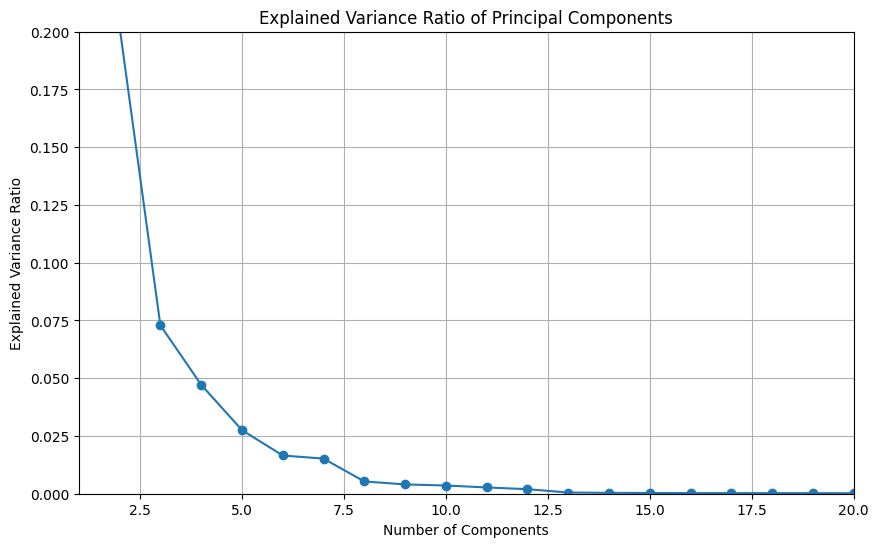

In [ ]:
import numpy as np

# Generate a range of component numbers
n_components = len(pca.explained_variance_ratio_)
component_numbers = np.arange(1, n_components + 1)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(component_numbers, pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

# Zoom in on a specific range of components
plt.xlim(1, 20)  
plt.ylim(0, 0.2)  

plt.show()

In [ ]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

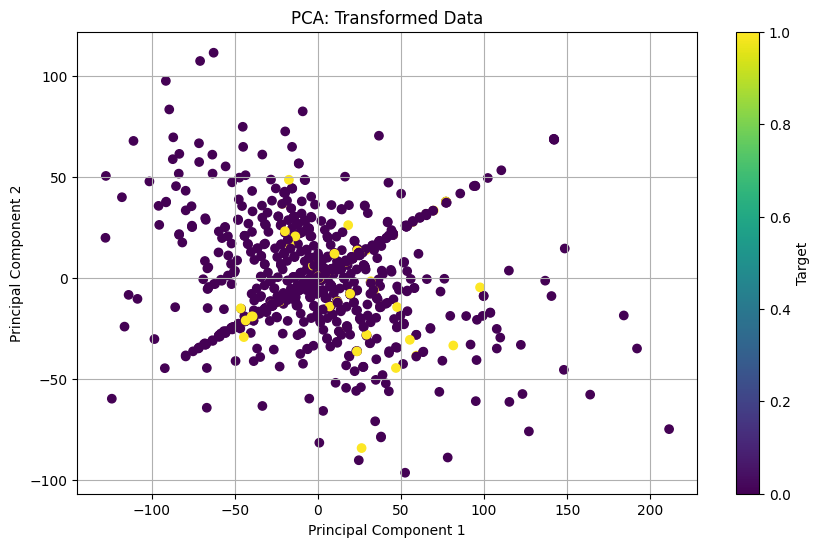

Loadings of each feature on the principal components:
[[-1.11949121e-02  1.25017888e-03  1.86366308e-03  2.92434424e-04
   3.02621340e-04 -1.63139155e-04 -8.46984360e-03 -3.79955550e-04
  -2.24234378e-02  1.09812465e-03 -2.68037688e-05  1.33447386e-05
   1.20706546e-04  1.09274756e-05 -5.70165663e-05 -1.18880345e-05
   9.06852589e-05 -3.33105629e-07  1.71001626e-05  4.19459274e-05
   5.63044018e-07 -1.40936635e-05  8.31773871e-07  3.43400928e-05
  -6.46823915e-04 -1.16145407e-04 -3.09718188e-05 -3.80602941e-05
   7.27861012e-04  8.98076005e-05  4.91336208e-05 -3.30657343e-05
  -3.86278591e-01 -1.99039636e-01 -7.91361360e-01 -4.28769461e-01
   5.07159931e-04  2.32404160e-03  4.02275452e-04  6.80251607e-05
   2.04269698e-04  2.59992757e-04  1.18793581e-04 -4.96777352e-04
   2.65135502e-03  1.02231739e-03  4.79726263e-04 -1.48990558e-03
   3.78475230e-04  4.34154773e-04 -8.77785332e-09  4.91543309e-04
   1.59999898e-04 -2.05677756e-04  4.20557704e-05 -2.51332216e-04
   4.39739684e-05  3.5

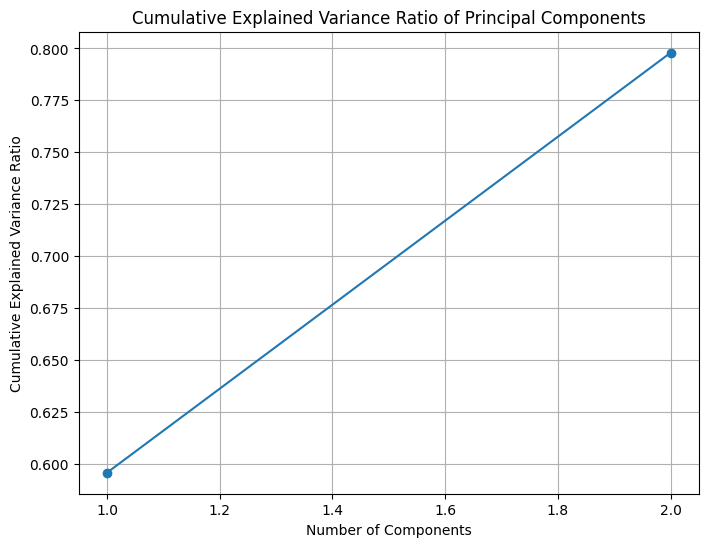

In [ ]:
y = data['FIBR_JELUD']
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()
# Analyze the loadings of each feature on the principal components
loadings = pca.components_
print("Loadings of each feature on the principal components:")
print(loadings)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an array for the component numbers
component_numbers = np.arange(1, len(cumulative_variance_ratio) + 1)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(component_numbers, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
# Print the coefficients of the first principal component
print("Coefficients of the first principal component:")
print(pca.components_[0])

Coefficients of the first principal component:
[-1.11949121e-02  1.25017888e-03  1.86366308e-03  2.92434424e-04
  3.02621340e-04 -1.63139155e-04 -8.46984360e-03 -3.79955550e-04
 -2.24234378e-02  1.09812465e-03 -2.68037688e-05  1.33447386e-05
  1.20706546e-04  1.09274756e-05 -5.70165663e-05 -1.18880345e-05
  9.06852589e-05 -3.33105629e-07  1.71001626e-05  4.19459274e-05
  5.63044018e-07 -1.40936635e-05  8.31773871e-07  3.43400928e-05
 -6.46823915e-04 -1.16145407e-04 -3.09718188e-05 -3.80602941e-05
  7.27861012e-04  8.98076005e-05  4.91336208e-05 -3.30657343e-05
 -3.86278591e-01 -1.99039636e-01 -7.91361360e-01 -4.28769461e-01
  5.07159931e-04  2.32404160e-03  4.02275452e-04  6.80251607e-05
  2.04269698e-04  2.59992757e-04  1.18793581e-04 -4.96777352e-04
  2.65135502e-03  1.02231739e-03  4.79726263e-04 -1.48990558e-03
  3.78475230e-04  4.34154773e-04 -8.77785332e-09  4.91543309e-04
  1.59999898e-04 -2.05677756e-04  4.20557704e-05 -2.51332216e-04
  4.39739684e-05  3.59251934e-04  1.0722024

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_[:2]

print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
  print(f"Principal Component {i+1}: {ratio:.4f}")

Explained Variance Ratio:
Principal Component 1: 0.5958
Principal Component 2: 0.2022


# **DATA PREDICTION**

## **Most important features with Decision Tree and Random Forest**

Here we should produce dummy variables. Categorical variables should not be used in inference with ascending order if there is no meaning to it. --> We need to double check all categorical features

In [ ]:
# Declare y and X
y = data_imputed["LET_IS"]
X = data_imputed.drop(["LET_IS", "ID"], axis=1) #dropping ID as well as it should not be used in evaluation
X.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.481455,0.263717,8.000000,16.00000,4.0,0.0,0.0,1.0,0.592522,0.691321,0.387097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.907051,81.394231,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.380000,0.180000,7.800000,3.00000,2.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000,100.000000,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.300000,0.110000,10.800000,13.44489,3.0,3.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,136.907051,81.394231,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.750000,0.370000,8.782914,13.44489,2.0,0.0,0.0,1.0,0.592522,0.691321,0.387097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.000000,100.000000,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.450000,0.220000,8.300000,13.44489,9.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

AGE              0.033518
SEX              0.000000
INF_ANAM         0.000496
STENOK_AN        0.006336
FK_STENOK        0.002564
IBS_POST         0.013063
GB               0.000000
SIM_GIPERT       0.004224
DLIT_AG          0.012250
ZSN_A            0.014190
nr_11            0.000000
nr_01            0.000000
nr_02            0.006272
nr_03            0.001588
nr_04            0.002958
nr_07            0.000000
nr_08            0.000000
np_01            0.000000
np_04            0.000000
np_05            0.000000
np_07            0.004378
np_08            0.000000
np_09            0.000000
np_10            0.014363
endocr_01        0.000000
endocr_02        0.000000
endocr_03        0.000000
zab_leg_01       0.000000
zab_leg_02       0.003379
zab_leg_03       0.008843
zab_leg_04       0.000000
zab_leg_06       0.000000
S_AD_KBRIG       0.017966
D_AD_KBRIG       0.010850
S_AD_ORIT        0.022062
D_AD_ORIT        0.016274
O_L_POST         0.000000
K_SH_POST        0.000000
MP_TP_POST  

<Axes: >

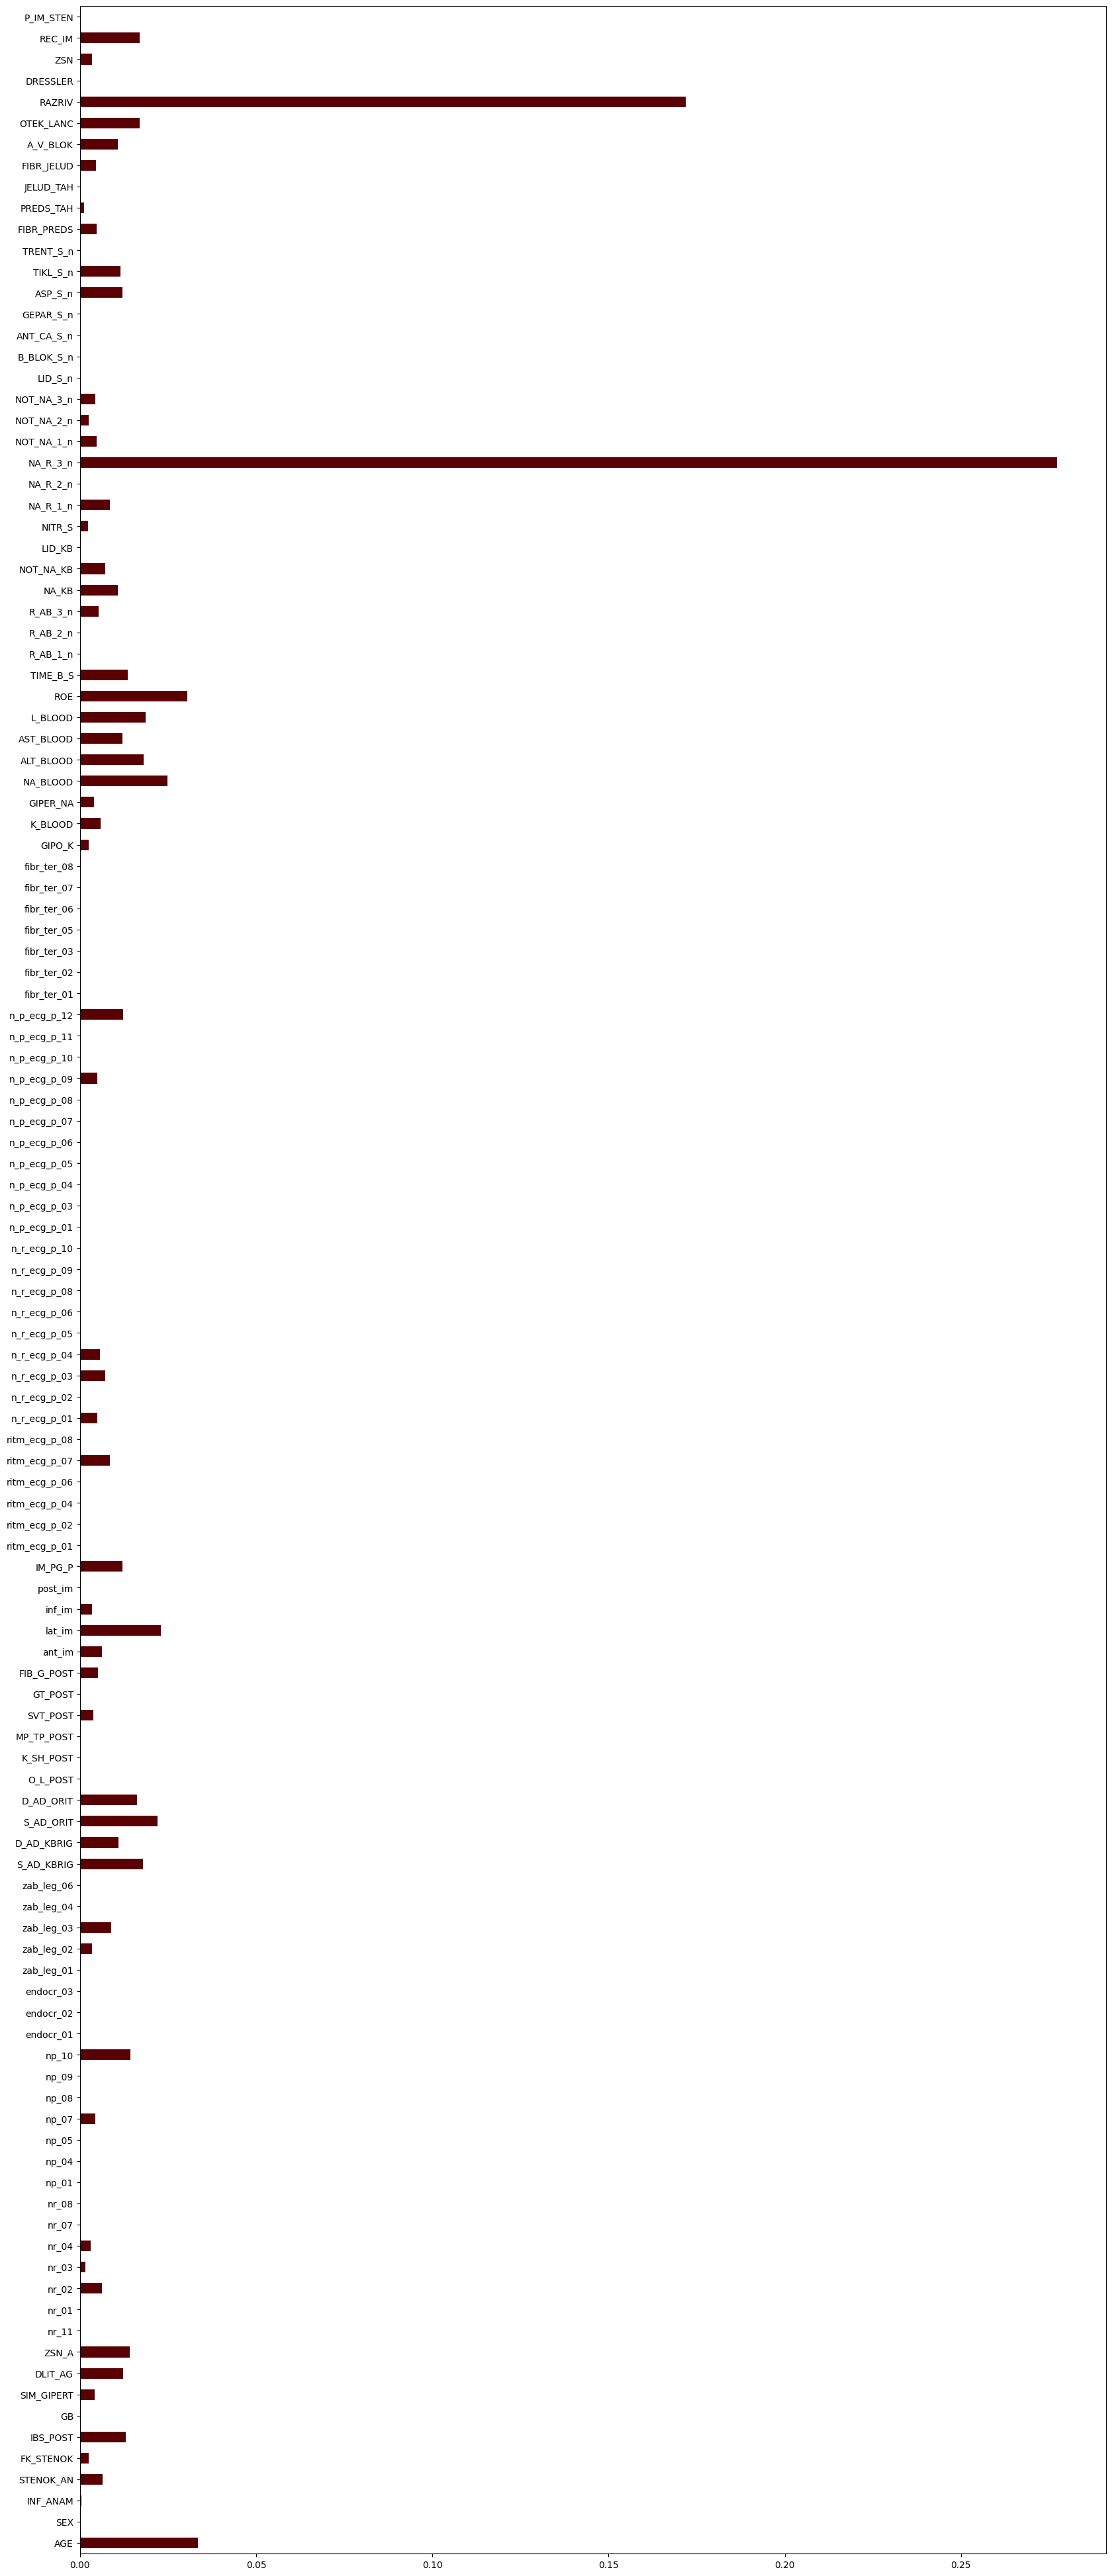

In [ ]:
feat_importances_DT = pd.Series(model.feature_importances_, index=X_train.columns)
print(feat_importances_DT) #printing the feature importances because the other values are so small they do not show up on the graph
plt.figure(figsize=(20,50))
feat_importances_DT.plot(kind='barh', color = "#590004")

AGE              0.023940
SEX              0.005679
INF_ANAM         0.011326
STENOK_AN        0.013610
FK_STENOK        0.008325
IBS_POST         0.009798
GB               0.007796
SIM_GIPERT       0.002997
DLIT_AG          0.009766
ZSN_A            0.021162
nr_11            0.000703
nr_01            0.001268
nr_02            0.001692
nr_03            0.002463
nr_04            0.005646
nr_07            0.002853
nr_08            0.001279
np_01            0.002239
np_04            0.003144
np_05            0.001616
np_07            0.002540
np_08            0.002685
np_09            0.000528
np_10            0.003431
endocr_01        0.005733
endocr_02        0.003821
endocr_03        0.001099
zab_leg_01       0.002000
zab_leg_02       0.005066
zab_leg_03       0.005816
zab_leg_04       0.000591
zab_leg_06       0.000610
S_AD_KBRIG       0.016987
D_AD_KBRIG       0.015113
S_AD_ORIT        0.033342
D_AD_ORIT        0.027102
O_L_POST         0.005705
K_SH_POST        0.016515
MP_TP_POST  

<Axes: >

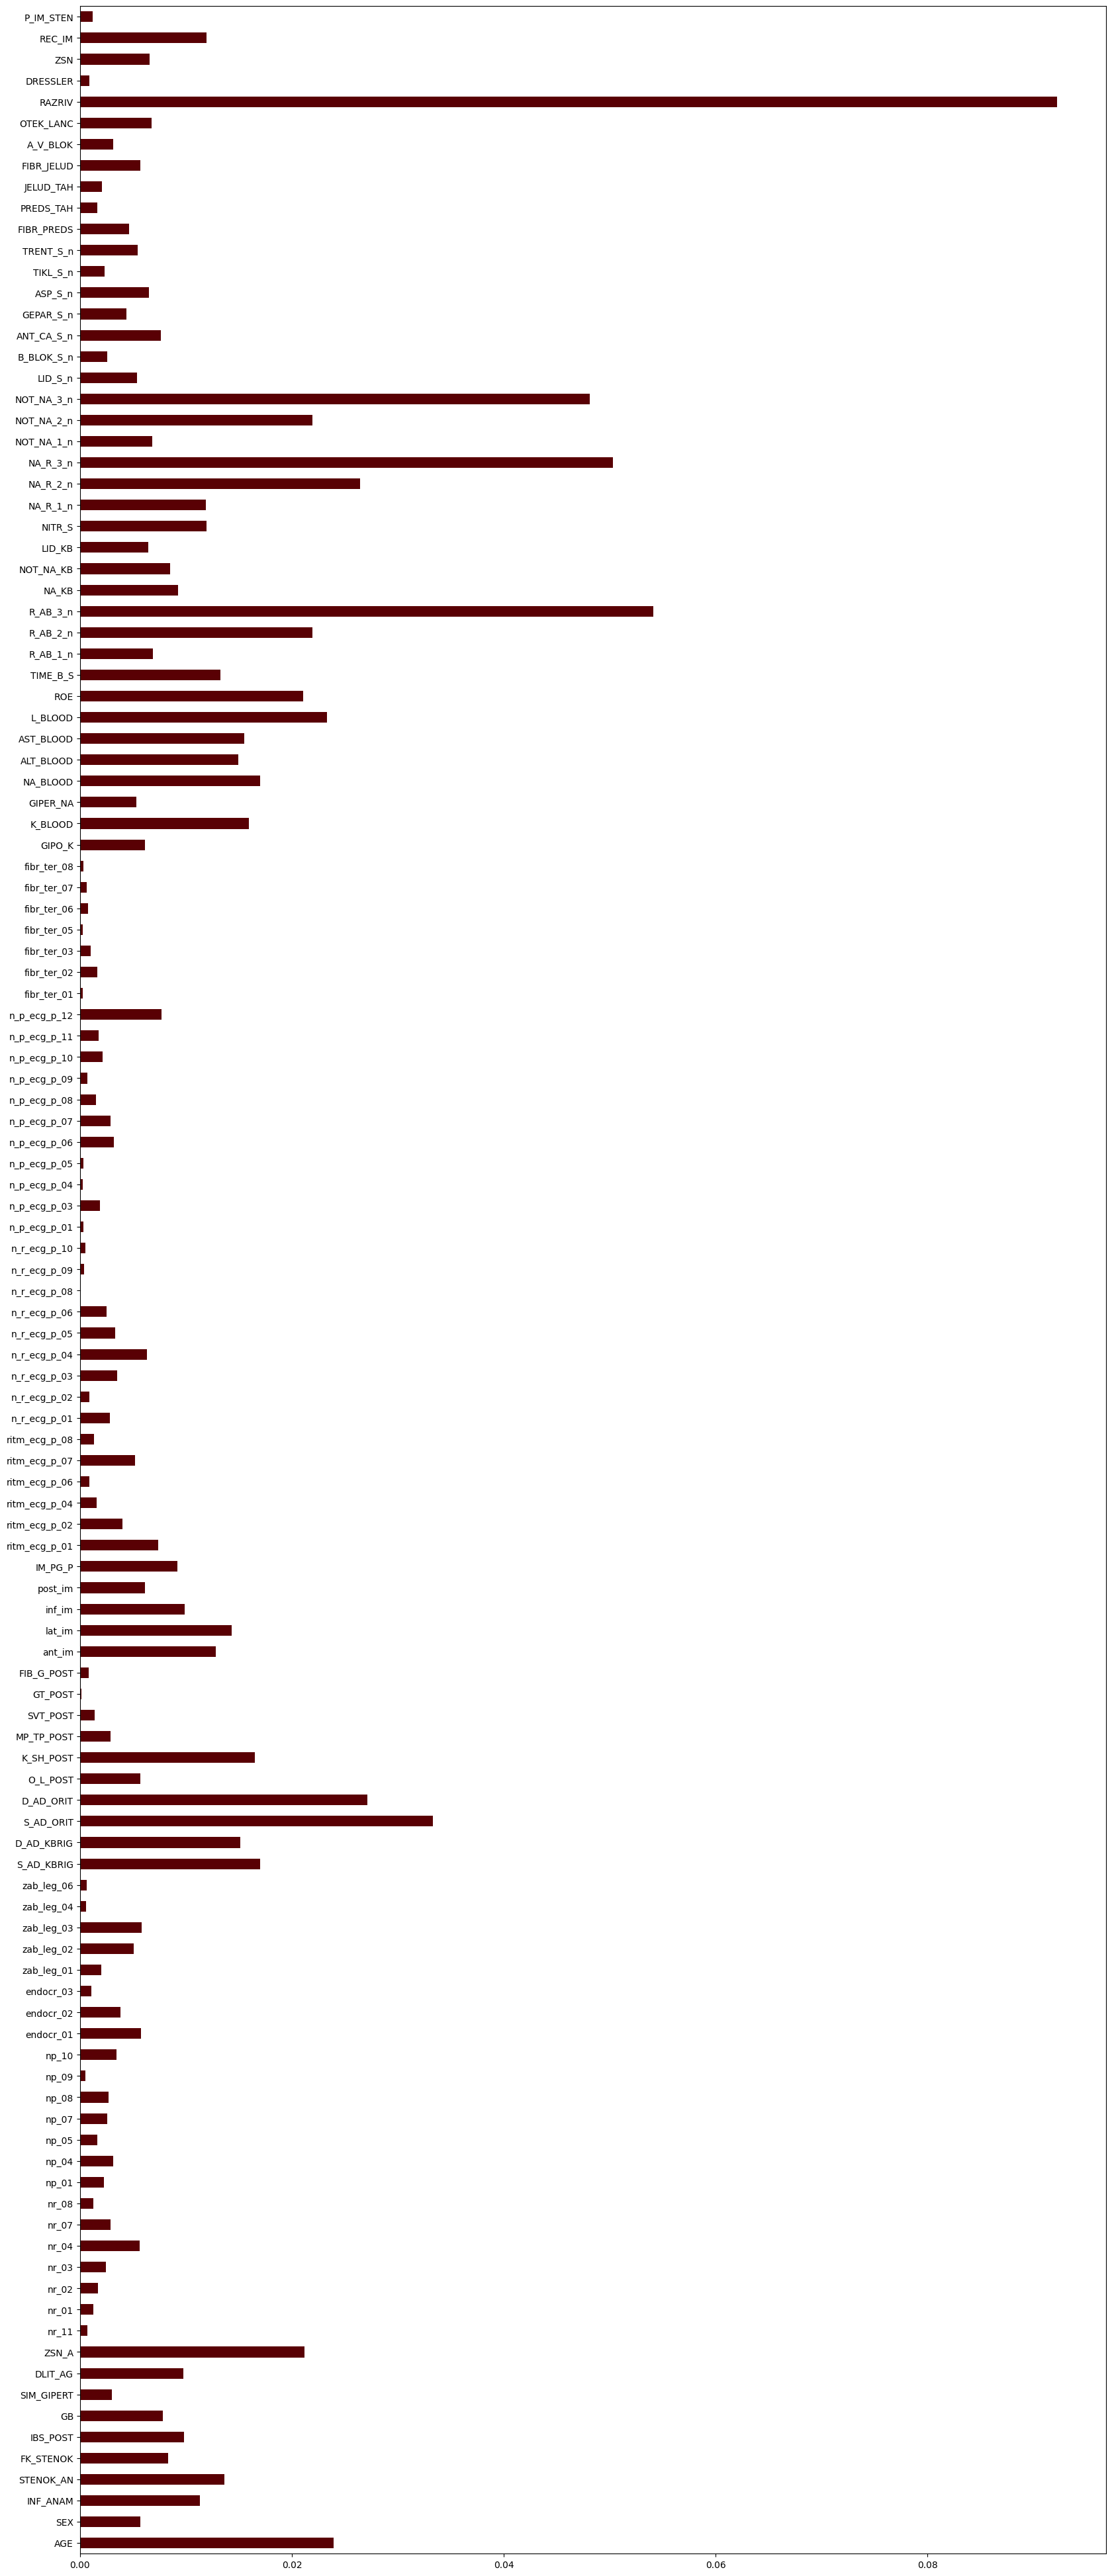

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
feat_importances_RF = pd.Series(rfc.feature_importances_, index=X_train.columns)
print(feat_importances_RF) #printing the feature importances because the other values are so small they do not show up on the graph
plt.figure(figsize=(20, 50))
feat_importances_RF.plot(kind='barh', color = "#590004")

In [ ]:
#extracting columns where both decision tree and random forest were 0
zero_cols = (feat_importances_DT < 0.001) & (feat_importances_RF < 0.001)
zero_cols_names = (zero_cols[zero_cols].index.tolist())
print(len(zero_cols_names))
print(zero_cols_names)

19
['nr_11', 'np_09', 'zab_leg_04', 'zab_leg_06', 'GT_POST', 'ritm_ecg_p_06', 'n_r_ecg_p_02', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'fibr_ter_01', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'DRESSLER']


## **Prediction of Ventricular Fibrillation with SVM**

Detection of features most related to Ventricular fibrillation (just the ones obtained in the patient-doctor interview / medical history)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Choose "X" as the 33 features realted to Patient - Doctor Interview and "y" as Ventricular Fibrillation outcome
columns_drop = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm = data_imputed.drop(columns_drop, axis=1)
y_svm = data_imputed['FIBR_JELUD']
print(X_svm.shape)
print(y_svm.shape)

(1700, 32)
(1700,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

#SVM model
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_svm, y_svm.ravel())

# Get the coefficients associated with all features
coefficients = svm_classifier.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients = {X.columns[i]: coefficients[i] for i in range(len(coefficients))}

# Sort coefficients
sorted_feature_coefficients = dict(sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: nr_04, Importance: 0.0014025320009275616
Feature: nr_03, Importance: 0.0011416644631586335
Feature: nr_02, Importance: 0.0008293065242570303
Feature: nr_11, Importance: 0.0008228531728237433
Feature: zab_leg_02, Importance: 0.0007741240319258935
Feature: SEX, Importance: 0.0002479174377398863
Feature: SIM_GIPERT, Importance: 0.00022914284018375058
Feature: IBS_POST, Importance: 0.00017864370673681407
Feature: endocr_03, Importance: 0.00012796590895924886
Feature: zab_leg_06, Importance: 7.988248330148551e-05
Feature: STENOK_AN, Importance: 4.40636575618214e-05
Feature: GB, Importance: -3.808181604991745e-05
Feature: AGE, Importance: -5.314050940796733e-05
Feature: zab_leg_01, Importance: -7.060056177321528e-05
Feature: DLIT_AG, Importance: -9.77328697202573e-05
Feature: INF_ANAM, Importance: -0.00011721750373183681
Feature: FK_STENOK, Importance: -0.00019403894662595178
Feature: np_05, Importance: -0.0002407230505494535
Feature: endocr_01, Importance: -0.00029791819128988095
F

{'nr_04': 0.0014025320009275616, 'nr_03': 0.0011416644631586335, 'nr_02': 0.0008293065242570303, 'nr_11': 0.0008228531728237433, 'zab_leg_02': 0.0007741240319258935}


C:\Users\yoelh\AppData\Local\Temp\ipykernel_30572\4212403046.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Atrial fibrillation',


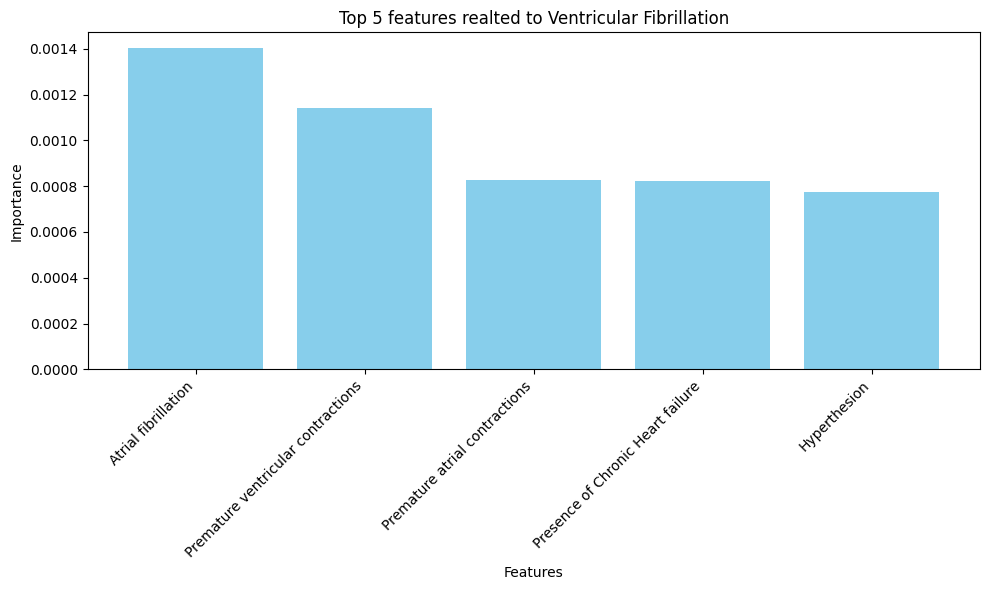

In [ ]:
# Take the top 5 features
top_features = dict(list(sorted_feature_coefficients.items())[:5])
print(top_features)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features.keys(), top_features.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Atrial fibrillation',
                           'Premature ventricular contractions',
                           'Premature atrial contractions',
                           'Presence of Chronic Heart failure',
                           'Hyperthesion'], rotation=45, ha='right') # Renaming x-axis labels
#I think these names need correction to: Atrial fibrillation, Paroxysms of atrial fibrillation, Premature ventricular contractions, 
#irregular heartbeat and hypertension
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with y_test to check accuracy
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.961764705882353


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       327
         1.0       0.00      0.00      0.00        13

    accuracy                           0.96       340
   macro avg       0.48      0.50      0.49       340
weighted avg       0.92      0.96      0.94       340

Mean Squared Error: 0.03823529411764706


C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

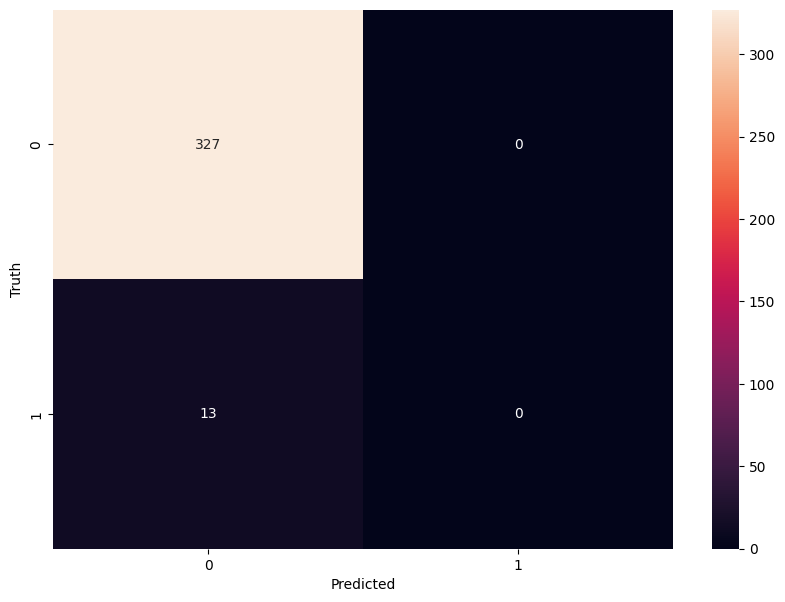

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

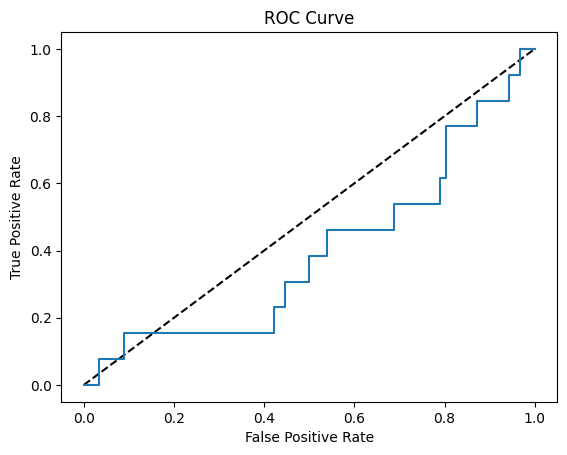

AUC:  0.3928487414725947


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the predictions
y_pred_proba = svm_classifier.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate and print the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

## **Prediction of Atrial Fibrillation with SVM**

In [ ]:
# Choose "X" as the 33 features realted to Patient - Doctor Interview and "y" as Ventricular Fibrillation outcome
columns_drop1 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm1 = data_imputed.drop(columns_drop1, axis=1)
y_svm1 = data_imputed['FIBR_PREDS']
print(X_svm1.shape)
print(y_svm1.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_svm1, y_svm1, test_size=0.2, random_state=42)

# SVM model
svm_classifier1 = SVC(kernel='linear', probability=True)
svm_classifier1.fit(X_svm1, y_svm1.ravel())

# Get the coefficients associated with all features
coefficients1 = svm_classifier1.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients1 = {X_svm1.columns[i]: coefficients1[i] for i in range(len(coefficients1))}

# Sort coefficients
sorted_feature_coefficients1 = dict(sorted(feature_coefficients1.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients1.items():
    print(f"Feature: {feature}, Importance: {importance}")


KeyError: "['KFK_BLOOD'] not found in axis"

{'nr_07': 0.9959349816642179, 'nr_03': 0.009118371930796343, 'nr_01': 0.008694152943686806, 'nr_11': 0.004807908585382492, 'zab_leg_03': 0.003271667911569409}


C:\Users\yoelh\AppData\Local\Temp\ipykernel_38044\4048590202.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Ventricle fibrillation in anamnesis',


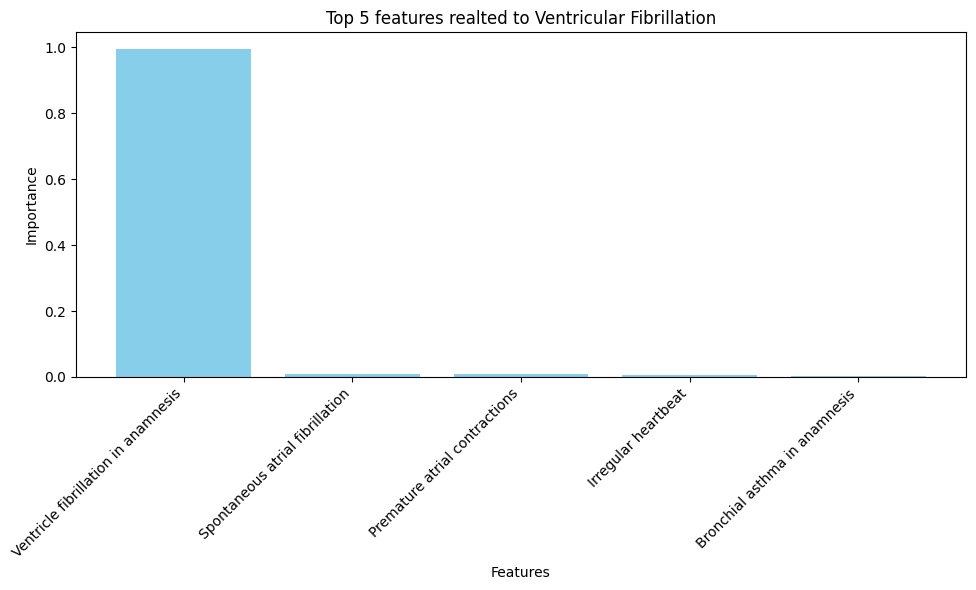

In [ ]:
# Take the top 5 features
top_features1 = dict(list(sorted_feature_coefficients1.items())[:5])
print(top_features1)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features1.keys(), top_features1.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Ventricle fibrillation in anamnesis',
                           'Spontaneous atrial fibrillation',
                           'Premature atrial contractions',
                           'Irregular heartbeat',
                           'Bronchial asthma in anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with y_test to check accuracy
y_pred1 = svm_classifier1.predict(X_test1)

# Calculate accuracy
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.8970588235294118


## **Prediction of Supraventricular tachycardia  with SVM**

Supraventricular tachycardia = irregular heartbeat - fast or erratic 

In [ ]:
# Choose "X" as the 33 features realted to Patient - Doctor Interview and "y" as Ventricular Fibrillation outcome
columns_drop2 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm2= data_imputed.drop(columns_drop2, axis=1)
y_svm2 = data_imputed['PREDS_TAH']
print(X_svm2.shape)
print(y_svm2.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_svm2, y_svm2, test_size=0.2, random_state=42)

# SVM model
svm_classifier2 = SVC(kernel='linear', probability=True)
svm_classifier2.fit(X_svm2, y_svm2.ravel())

# Get the coefficients associated with all features
coefficients2 = svm_classifier2.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients2 = {X_svm2.columns[i]: coefficients2[i] for i in range(len(coefficients2))}

# Sort coefficients
sorted_feature_coefficients2 = dict(sorted(feature_coefficients2.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients2.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: zab_leg_02, Importance: 0.00036468749981288795
Feature: nr_11, Importance: 0.00035898444209991887
Feature: zab_leg_01, Importance: 0.00027214260396135614
Feature: endocr_01, Importance: 0.00024610027178351146
Feature: AGE, Importance: 2.7113240776088787e-05
Feature: IBS_POST, Importance: 2.500184978870834e-05
Feature: INF_ANAM, Importance: 2.4635342503742663e-05
Feature: zab_leg_03, Importance: 2.3941851113540302e-05
Feature: IBS_NASL, Importance: 7.993605777301127e-15
Feature: nr_01, Importance: 0.0
Feature: nr_03, Importance: 0.0
Feature: nr_04, Importance: 0.0
Feature: nr_07, Importance: 0.0
Feature: nr_08, Importance: 0.0
Feature: np_01, Importance: 0.0
Feature: np_04, Importance: 0.0
Feature: np_07, Importance: 0.0
Feature: np_08, Importance: 0.0
Feature: np_09, Importance: 0.0
Feature: np_10, Importance: 0.0
Feature: endocr_02, Importance: 0.0
Feature: endocr_03, Importance: 0.0
Feature: zab_leg_06, Importance: 0.0
Feature: FK_STENOK, Importance: -5.68

{'zab_leg_02': 0.00036468749981288795, 'nr_11': 0.00035898444209991887, 'zab_leg_01': 0.00027214260396135614, 'endocr_01': 0.00024610027178351146, 'AGE': 2.7113240776088787e-05}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\3857998957.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',


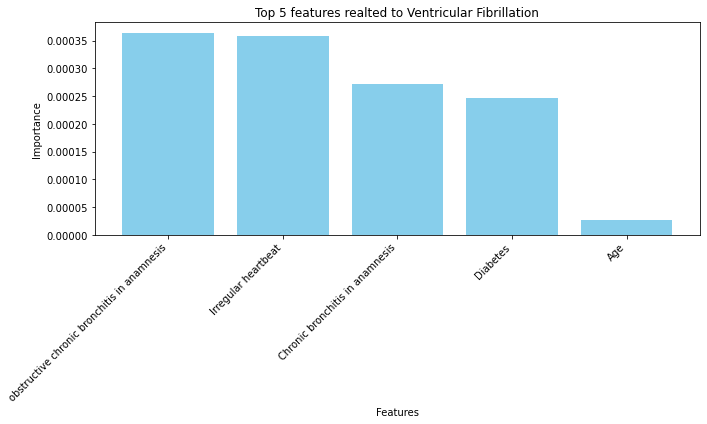

In [ ]:
# Take the top 5 features
top_features2 = dict(list(sorted_feature_coefficients2.items())[:5])
print(top_features2)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features2.keys(), top_features2.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',
                           'Irregular heartbeat',
                           'Chronic bronchitis in anamnesis',
                           'Diabetes',
                           'Age'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with y_test to check accuracy
y_pred2= svm_classifier2.predict(X_test2)

# Calculate accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.9911764705882353


## **Prediction of Ventricular tachycardia with SVM**

In [ ]:
# Choose "X" as the 33 features realted to Patient - Doctor Interview and "y" as Ventricular Fibrillation outcome
columns_drop3 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm3= data_imputed.drop(columns_drop3, axis=1)
y_svm3 = data_imputed['JELUD_TAH']
print(X_svm3.shape)
print(y_svm3.shape)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_svm3, y_svm3, test_size=0.2, random_state=42)

# SVM model
svm_classifier3 = SVC(kernel='linear', probability=True)
svm_classifier3.fit(X_svm3, y_svm3.ravel())

# Get the coefficients associated with all features
coefficients3 = svm_classifier3.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients3 = {X_svm3.columns[i]: coefficients3[i] for i in range(len(coefficients3))}

# Sort coefficients
sorted_feature_coefficients3 = dict(sorted(feature_coefficients3.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients3.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: np_08, Importance: 0.0017743305221962213
Feature: endocr_02, Importance: 0.0008610764914920299
Feature: SEX, Importance: 0.0006755146106982579
Feature: zab_leg_02, Importance: 0.000498928564766743
Feature: nr_11, Importance: 0.00044220191189525693
Feature: endocr_01, Importance: 0.0001891281618950913
Feature: IBS_NASL, Importance: 0.00012882473598807564
Feature: DLIT_AG, Importance: 4.245225490251414e-06
Feature: nr_01, Importance: 0.0
Feature: nr_07, Importance: 0.0
Feature: nr_08, Importance: 0.0
Feature: np_01, Importance: 0.0
Feature: np_04, Importance: 0.0
Feature: np_05, Importance: 0.0
Feature: np_07, Importance: 0.0
Feature: np_09, Importance: 0.0
Feature: np_10, Importance: 0.0
Feature: endocr_03, Importance: 0.0
Feature: zab_leg_03, Importance: 0.0
Feature: zab_leg_04, Importance: 0.0
Feature: zab_leg_06, Importance: 0.0
Feature: zab_leg_01, Importance: -6.765576259448736e-06
Feature: AGE, Importance: -1.977909869310679e-05
Feature: nr_02, Importan

{'np_08': 0.0017743305221962213, 'endocr_02': 0.0008610764914920299, 'SEX': 0.0006755146106982579, 'zab_leg_02': 0.000498928564766743, 'nr_11': 0.00044220191189525693}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\637754266.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Complete LBBB in anamnesis',


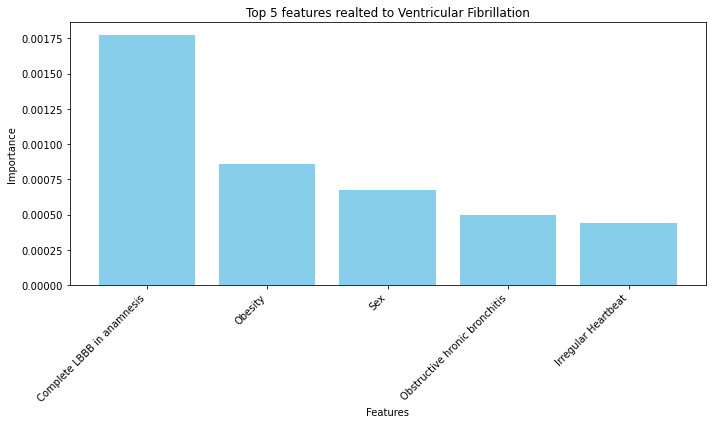

In [ ]:
# Take the top 5 features
top_features3 = dict(list(sorted_feature_coefficients3.items())[:5])
print(top_features3)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features3.keys(), top_features3.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Complete LBBB in anamnesis',
                           'Obesity',
                           'Sex',
                           'Obstructive hronic bronchitis',
                           'Irregular Heartbeat'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with y_test to check accuracy
y_pred3= svm_classifier3.predict(X_test3)

# Calculate accuracy
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 0.9882352941176471


## **Prediction of Third-degree AV block with SVM**

complete loss of communication between atria and ventricles

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Atrioventricular Block outcome
columns_drop4 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm4 = data_imputed.drop(columns_drop4, axis=1)
y_svm4 = data_imputed['A_V_BLOK']
print(X_svm4.shape)
print(y_svm4.shape)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_svm4, y_svm4, test_size=0.2, random_state=42)

# SVM model
svm_classifier4 = SVC(kernel='linear', probability=True)
svm_classifier4.fit(X_train4, y_train4)

# Get the coefficients associated with all features
coefficients4 = svm_classifier4.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients4 = {X_svm4.columns[i]: coefficients4[i] for i in range(len(coefficients4))}

# Sort coefficients
sorted_feature_coefficients4 = dict(sorted(feature_coefficients4.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients4.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: zab_leg_02, Importance: 0.0004705539076210741
Feature: zab_leg_06, Importance: 0.0003384678093452109
Feature: endocr_01, Importance: 0.00022832687800455886
Feature: zab_leg_01, Importance: 0.00017139045109981765
Feature: SEX, Importance: 0.00012783623042622594
Feature: IBS_POST, Importance: 8.740346987679004e-05
Feature: FK_STENOK, Importance: 1.3461186162189165e-05
Feature: AGE, Importance: 5.2590007726394106e-06
Feature: nr_01, Importance: 0.0
Feature: nr_04, Importance: 0.0
Feature: nr_07, Importance: 0.0
Feature: nr_08, Importance: 0.0
Feature: np_01, Importance: 0.0
Feature: np_04, Importance: 0.0
Feature: np_05, Importance: 0.0
Feature: np_07, Importance: 0.0
Feature: np_09, Importance: 0.0
Feature: np_10, Importance: 0.0
Feature: IBS_NASL, Importance: -1.0658141036401503e-14
Feature: nr_02, Importance: -2.0771034788426637e-05
Feature: STENOK_AN, Importance: -2.1354987502775202e-05
Feature: nr_03, Importance: -3.550357602601084e-05
Feature: DLIT_AG, Im

{'zab_leg_02': 0.0004705539076210741, 'zab_leg_06': 0.0003384678093452109, 'endocr_01': 0.00022832687800455886, 'zab_leg_01': 0.00017139045109981765, 'SEX': 0.00012783623042622594}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\3844666425.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',


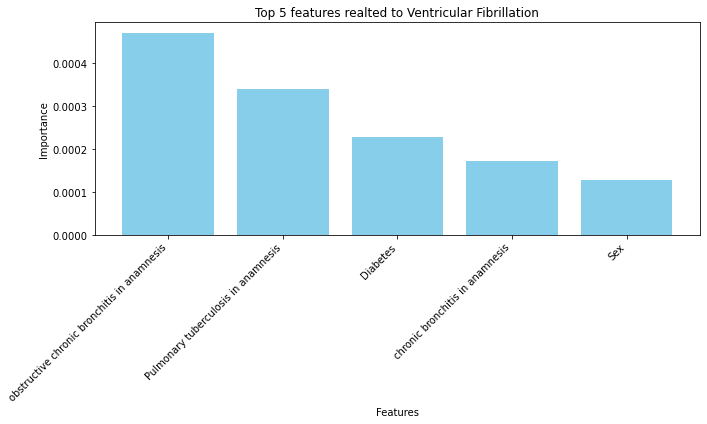

In [ ]:
# Take the top 5 features
top_features4= dict(list(sorted_feature_coefficients4.items())[:5])
print(top_features4)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features4.keys(), top_features4.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',
                           'Pulmonary tuberculosis in anamnesis',
                           'Diabetes',
                           'chronic bronchitis in anamnesis',
                           'Sex'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred4= svm_classifier4.predict(X_test4)

# Calculate accuracy
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy:", accuracy4)

Accuracy: 0.9676470588235294


## **Prediction of Pulmonary edema with SVM**

excessive fluid in the lungs

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Atrioventricular Block outcome
columns_drop5 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm5= data_imputed.drop(columns_drop5, axis=1)
y_svm5 = data_imputed['OTEK_LANC']
print(X_svm5.shape)
print(y_svm5.shape)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_svm5, y_svm5, test_size=0.2, random_state=42)

# SVM model
svm_classifier5 = SVC(kernel='linear', probability=True)
svm_classifier5.fit(X_train5, y_train5)

# Get the coefficients associated with all features
coefficients5 = svm_classifier5.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients5 = {X_svm5.columns[i]: coefficients5[i] for i in range(len(coefficients5))}

# Sort coefficients
sorted_feature_coefficients5 = dict(sorted(feature_coefficients5.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients5.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: np_04, Importance: 0.5067896759965282
Feature: np_10, Importance: 0.0032631642396176996
Feature: nr_01, Importance: 0.0029822114292726853
Feature: SIM_GIPERT, Importance: 0.0027728002060003476
Feature: nr_04, Importance: 0.0019547278438398763
Feature: zab_leg_02, Importance: 0.0014784113397645626
Feature: zab_leg_04, Importance: 0.001008183053885281
Feature: zab_leg_06, Importance: 0.0009245615952720998
Feature: endocr_01, Importance: 0.0008636390994505305
Feature: nr_03, Importance: 0.0007980363072719321
Feature: GB, Importance: 0.0006892994958320742
Feature: INF_ANAM, Importance: 0.000501713201387588
Feature: ZSN_A, Importance: 0.0003656184752429681
Feature: FK_STENOK, Importance: 0.0003541261887143321
Feature: IBS_POST, Importance: 0.00017316648197152062
Feature: np_08, Importance: 1.0018028073766061e-16
Feature: np_01, Importance: 0.0
Feature: np_07, Importance: 0.0
Feature: np_09, Importance: 0.0
Feature: AGE, Importance: -7.525844557676464e-05
Feature:

{'np_04': 0.5067896759965282, 'np_10': 0.0032631642396176996, 'nr_01': 0.0029822114292726853, 'SIM_GIPERT': 0.0027728002060003476, 'nr_04': 0.0019547278438398763}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\4035522729.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',


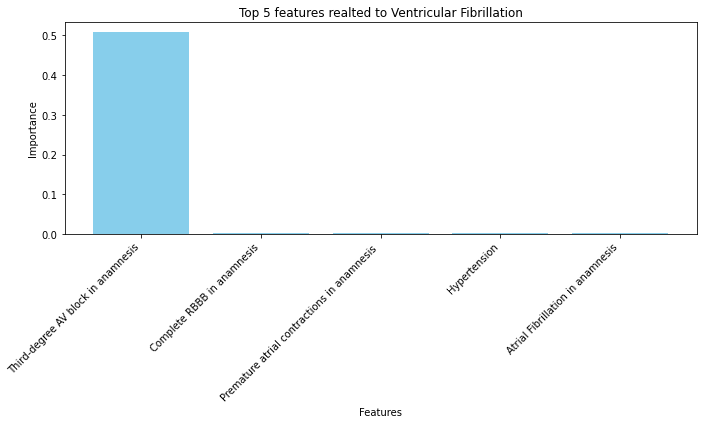

In [ ]:
# Take the top 5 features
top_features5= dict(list(sorted_feature_coefficients5.items())[:5])
print(top_features5)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features5.keys(), top_features5.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',
                           'Complete RBBB in anamnesis',
                           'Premature atrial contractions in anamnesis ',
                           'Hypertension',
                           'Atrial Fibrillation in anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred5= svm_classifier5.predict(X_test5)

# Calculate accuracy
accuracy5 = accuracy_score(y_test5, y_pred5)
print("Accuracy:", accuracy5)

Accuracy: 0.9323529411764706


## **Prediction of Myocardial rupture with SVM**

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Atrioventricular Block outcome
columns_drop6 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm6= data_imputed.drop(columns_drop6, axis=1)
y_svm6 = data_imputed['RAZRIV']
print(X_svm6.shape)
print(y_svm6.shape)

X_train6, X_test6, y_train6, y_test6 = train_test_split(X_svm6, y_svm6, test_size=0.2, random_state=42)

# SVM model
svm_classifier6 = SVC(kernel='linear', probability=True)
svm_classifier6.fit(X_train6, y_train6)

# Get the coefficients associated with all features
coefficients6 = svm_classifier6.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients6 = {X_svm6.columns[i]: coefficients6[i] for i in range(len(coefficients6))}

# Sort coefficients
sorted_feature_coefficients6 = dict(sorted(feature_coefficients6.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients6.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: np_01, Importance: 0.0061803861044229524
Feature: SIM_GIPERT, Importance: 0.002606990279860888
Feature: np_04, Importance: 0.001714585683706312
Feature: nr_08, Importance: 0.0014161576580644726
Feature: np_08, Importance: 0.0013524781197259798
Feature: nr_04, Importance: 0.0012600818421526494
Feature: np_09, Importance: 0.0011890606420927466
Feature: nr_02, Importance: 0.001161378038623484
Feature: np_05, Importance: 0.0011364719037495951
Feature: zab_leg_02, Importance: 0.0009098431441865173
Feature: endocr_01, Importance: 0.0008254300458343522
Feature: nr_03, Importance: 0.0006068652719303236
Feature: np_07, Importance: 0.0005945303210463733
Feature: np_10, Importance: 0.0005604154442060167
Feature: GB, Importance: 0.0004589811841242408
Feature: ZSN_A, Importance: 0.0004375187964695826
Feature: endocr_02, Importance: 0.00043157773750568396
Feature: nr_07, Importance: 0.00035403941451611816
Feature: zab_leg_01, Importance: 0.00034252963083192256
Feature: ST

{'np_01': 0.0061803861044229524, 'SIM_GIPERT': 0.002606990279860888, 'np_04': 0.001714585683706312, 'nr_08': 0.0014161576580644726, 'np_08': 0.0013524781197259798}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\3499456874.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['First-degree AV block in anamnesis',


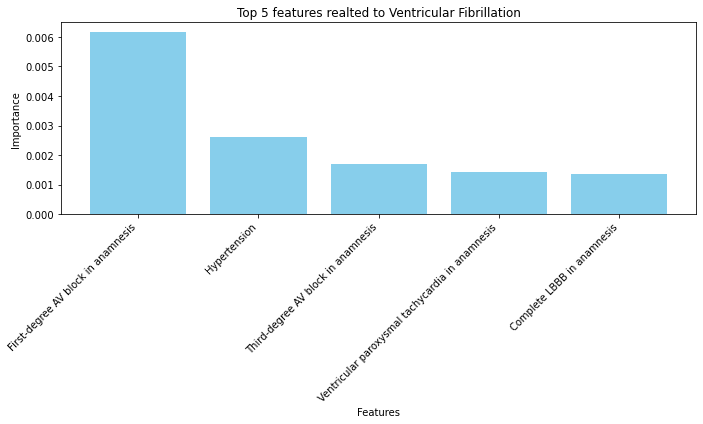

In [ ]:
# Take the top 5 features
top_features6= dict(list(sorted_feature_coefficients6.items())[:5])
print(top_features6)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features6.keys(), top_features6.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['First-degree AV block in anamnesis',
                           'Hypertension',
                           'Third-degree AV block in anamnesis',
                           'Ventricular paroxysmal tachycardia in anamnesis',
                           'Complete LBBB in anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred6= svm_classifier6.predict(X_test6)

# Calculate accuracy
accuracy6 = accuracy_score(y_test6, y_pred6)
print("Accuracy:", accuracy6)

Accuracy: 0.9676470588235294


## **Prediction of Dressler Syndrome with SVM**

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Atrioventricular Block outcome
columns_drop7 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm7= data_imputed.drop(columns_drop7, axis=1)
y_svm7 = data_imputed['DRESSLER']
print(X_svm7.shape)
print(y_svm7.shape)

X_train7, X_test7, y_train7, y_test7 = train_test_split(X_svm7, y_svm7, test_size=0.2, random_state=42)

# SVM model
svm_classifier7 = SVC(kernel='linear', probability=True)
svm_classifier7.fit(X_train7, y_train7)

# Get the coefficients associated with all features
coefficients7= svm_classifier7.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients7 = {X_svm7.columns[i]: coefficients7[i] for i in range(len(coefficients7))}

# Sort coefficients
sorted_feature_coefficients7 = dict(sorted(feature_coefficients7.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients7.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: endocr_03, Importance: 0.0005479874859146694
Feature: nr_11, Importance: 0.00045720471089549797
Feature: zab_leg_04, Importance: 0.0003797090803674408
Feature: zab_leg_02, Importance: 0.00033713220651154785
Feature: IBS_POST, Importance: 0.00016913689393049935
Feature: STENOK_AN, Importance: 0.00012902221777721934
Feature: SIM_GIPERT, Importance: 2.980182450240676e-05
Feature: IBS_NASL, Importance: 2.057534075561307e-06
Feature: zab_leg_01, Importance: 1.176969632865621e-11
Feature: zab_leg_06, Importance: 0.0
Feature: AGE, Importance: -1.8548821572039742e-05
Feature: endocr_01, Importance: -4.807101141057757e-05
Feature: SEX, Importance: -0.0001406734170146251
Feature: INF_ANAM, Importance: -0.00015462478167904692
Feature: DLIT_AG, Importance: -0.0002250466528579409
Feature: endocr_02, Importance: -0.0002433019986902707
Feature: FK_STENOK, Importance: -0.0003653747875675961
Feature: GB, Importance: -0.00037101150405760563
Feature: np_07, Importance: -0.0011

{'endocr_03': 0.0005479874859146694, 'nr_11': 0.00045720471089549797, 'zab_leg_04': 0.0003797090803674408, 'zab_leg_02': 0.00033713220651154785, 'IBS_POST': 0.00016913689393049935}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\4278236473.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Thyrotoxicosis in anamnesis',


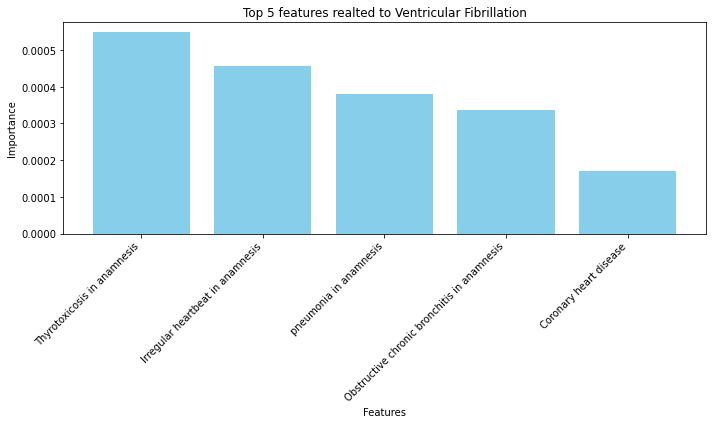

In [ ]:
# Take the top 5 features
top_features7= dict(list(sorted_feature_coefficients7.items())[:5])
print(top_features7)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features7.keys(), top_features7.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Thyrotoxicosis in anamnesis',
                           'Irregular heartbeat in anamnesis',
                           'pneumonia in anamnesis',
                           'Obstructive chronic bronchitis in anamnesis',
                           'Coronary heart disease'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred7= svm_classifier7.predict(X_test7)

# Calculate accuracy
accuracy7 = accuracy_score(y_test7, y_pred7)
print("Accuracy:", accuracy7)

Accuracy: 0.95


## **Prediction of chronic heart failure with SVM**

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Dressler Syndrome outcome
columns_drop8 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm8 = data_imputed.drop(columns_drop8, axis=1)
y_svm8 = data_imputed['ZSN']
print(X_svm8.shape)
print(y_svm8.shape)

X_train8, X_test8, y_train8, y_test8 = train_test_split(X_svm8, y_svm8, test_size=0.2, random_state=42)

# SVM model
svm_classifier8 = SVC(kernel='linear', probability=True)
svm_classifier8.fit(X_train8, y_train8)

# Get the coefficients associated with all features
coefficients8 = svm_classifier8.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients8 = {X_svm8.columns[i]: coefficients8[i] for i in range(len(coefficients8))}

# Sort coefficients
sorted_feature_coefficients8 = dict(sorted(feature_coefficients8.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients8.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: np_09, Importance: 1.9845422116527942
Feature: nr_07, Importance: 0.9904705181655747
Feature: np_10, Importance: 0.9768133174791905
Feature: nr_01, Importance: 0.9618820726622987
Feature: nr_04, Importance: 0.7236450268016679
Feature: zab_leg_01, Importance: 0.005956664986051408
Feature: endocr_01, Importance: 0.00375115350085764
Feature: ZSN_A, Importance: 0.00372086538546057
Feature: endocr_02, Importance: 0.0034487706438319776
Feature: zab_leg_03, Importance: 0.0019908608529606298
Feature: nr_11, Importance: 0.0017001937985767768
Feature: np_01, Importance: 0.0015084964884164035
Feature: np_05, Importance: 0.0011522863677746464
Feature: AGE, Importance: -1.1930933396797627e-06
Feature: STENOK_AN, Importance: -1.93585411523145e-06
Feature: FK_STENOK, Importance: -0.00011676145710737273
Feature: nr_02, Importance: -0.00013486143812535545
Feature: zab_leg_02, Importance: -0.00018959352191316725
Feature: DLIT_AG, Importance: -0.0002167764826861429
Feature: IB

{'np_09': 1.9845422116527942, 'nr_07': 0.9904705181655747, 'np_10': 0.9768133174791905, 'nr_01': 0.9618820726622987, 'nr_04': 0.7236450268016679}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\4269205468.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Incomplete RBBB in anamnesis',


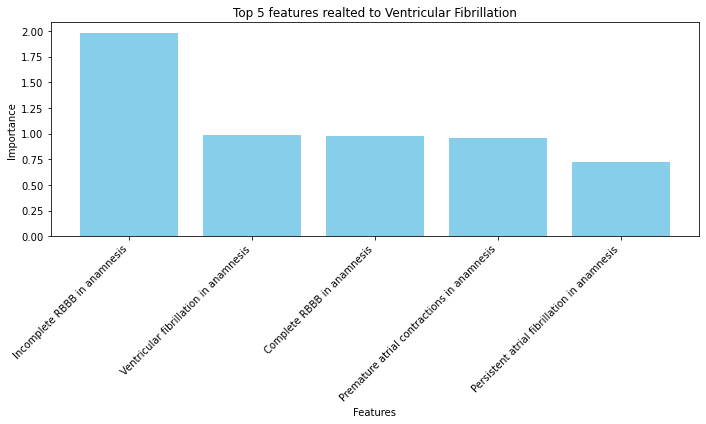

In [ ]:
# Take the top 5 features
top_features8= dict(list(sorted_feature_coefficients8.items())[:5])
print(top_features8)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features8.keys(), top_features8.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Incomplete RBBB in anamnesis',
                           'Ventricular fibrillation in anamnesis',
                           'Complete RBBB in anamnesis',
                           'Premature atrial contractions in anamnesis',
                           'Persistent atrial fibrillation in anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred8= svm_classifier8.predict(X_test8)

# Calculate accuracy
accuracy8 = accuracy_score(y_test8, y_pred8)
print("Accuracy:", accuracy8)

Accuracy: 0.7647058823529411


## **Prediction of relapse of myocardial infarction with SVM**

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Dressler Syndrome outcome
columns_drop9 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm9 = data_imputed.drop(columns_drop9, axis=1)
y_svm9 = data_imputed['REC_IM']
print(X_svm9.shape)
print(y_svm9.shape)

X_train9, X_test9, y_train9, y_test9 = train_test_split(X_svm9, y_svm9, test_size=0.2, random_state=42)

# SVM model
svm_classifier9 = SVC(kernel='linear', probability=True)
svm_classifier9.fit(X_train9, y_train9)

# Get the coefficients associated with all features
coefficients9 = svm_classifier9.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients9 = {X_svm9.columns[i]: coefficients9[i] for i in range(len(coefficients9))}

# Sort coefficients
sorted_feature_coefficients9 = dict(sorted(feature_coefficients9.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients9.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: np_01, Importance: 1.9903909217905957
Feature: np_10, Importance: 0.0019142472868208195
Feature: nr_03, Importance: 0.001715408949317876
Feature: nr_02, Importance: 0.0012653883244124753
Feature: zab_leg_03, Importance: 0.0011796799275991532
Feature: endocr_01, Importance: 0.000903388199803068
Feature: zab_leg_02, Importance: 0.0007479859135415268
Feature: SIM_GIPERT, Importance: 0.0005963832654005685
Feature: FK_STENOK, Importance: 0.0004302348540790035
Feature: SEX, Importance: 0.000264947437955243
Feature: endocr_03, Importance: 0.00024411352386891072
Feature: ZSN_A, Importance: 0.00016073952884454457
Feature: GB, Importance: 1.2786607555881346e-05
Feature: AGE, Importance: -1.6593547115917318e-05
Feature: zab_leg_06, Importance: -2.4836615931889128e-05
Feature: INF_ANAM, Importance: -2.9677031747610272e-05
Feature: DLIT_AG, Importance: -9.860044646003985e-05
Feature: STENOK_AN, Importance: -0.00011427960480148158
Feature: endocr_02, Importance: -0.000129

{'np_01': 1.9903909217905957, 'np_10': 0.0019142472868208195, 'nr_03': 0.001715408949317876, 'nr_02': 0.0012653883244124753, 'zab_leg_03': 0.0011796799275991532}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\1649181901.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['First-degree AV block in anamnesis ',


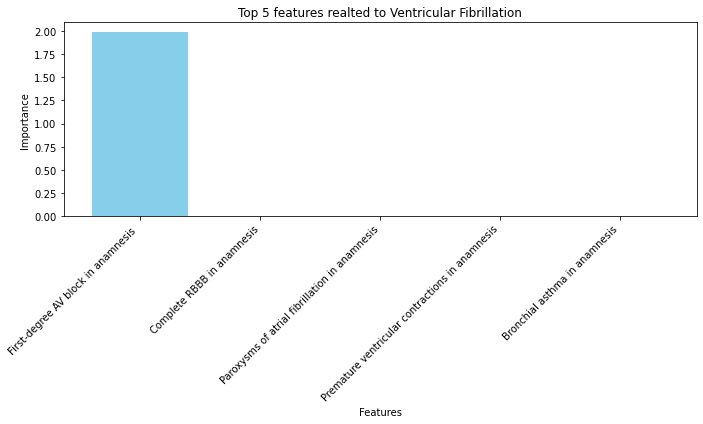

In [ ]:
# Take the top 5 features
top_features9= dict(list(sorted_feature_coefficients9.items())[:5])
print(top_features9)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features9.keys(), top_features9.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['First-degree AV block in anamnesis ',
                           'Complete RBBB in anamnesis',
                           'Paroxysms of atrial fibrillation in anamnesis',
                           'Premature ventricular contractions in anamnesis',
                           'Bronchial asthma in anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred9= svm_classifier9.predict(X_test9)

# Calculate accuracy
accuracy9 = accuracy_score(y_test9, y_pred9)
print("Accuracy:", accuracy9)

Accuracy: 0.9176470588235294


## **Prediction of Post-infarction angina with SVM**

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Dressler Syndrome outcome
columns_drop10 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm10 = data_imputed.drop(columns_drop10, axis=1)
y_svm10 = data_imputed['P_IM_STEN']
print(X_svm10.shape)
print(y_svm10.shape)

X_train10, X_test10, y_train10, y_test10 = train_test_split(X_svm10, y_svm10, test_size=0.2, random_state=42)

# SVM model
svm_classifier10 = SVC(kernel='linear', probability=True)
svm_classifier10.fit(X_train10, y_train10)

# Get the coefficients associated with all features
coefficients10 = svm_classifier10.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients10 = {X_svm10.columns[i]: coefficients10[i] for i in range(len(coefficients10))}

# Sort coefficients
sorted_feature_coefficients10 = dict(sorted(feature_coefficients10.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients10.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: nr_08, Importance: 0.01414142893394399
Feature: np_05, Importance: 0.0027363098374741934
Feature: IBS_NASL, Importance: 0.0025419692304211594
Feature: np_10, Importance: 0.0017706887263949644
Feature: np_08, Importance: 0.0013032272616460006
Feature: DLIT_AG, Importance: 0.0011472593227410677
Feature: zab_leg_01, Importance: 0.0009500024775253024
Feature: IBS_POST, Importance: 0.0007591983049621831
Feature: endocr_03, Importance: 0.000436563585201475
Feature: FK_STENOK, Importance: 0.0003128622143044879
Feature: INF_ANAM, Importance: 0.00015701404218759762
Feature: STENOK_AN, Importance: 0.00012388862981538296
Feature: endocr_01, Importance: 0.00012271895163173951
Feature: AGE, Importance: -5.6715713924404554e-05
Feature: zab_leg_06, Importance: -0.00015021561307504427
Feature: np_07, Importance: -0.0004369534022029787
Feature: SEX, Importance: -0.0007937164974833877
Feature: np_01, Importance: -0.0008739068044059573
Feature: nr_07, Importance: -0.0008950954

{'nr_08': 0.01414142893394399, 'np_05': 0.0027363098374741934, 'IBS_NASL': 0.0025419692304211594, 'np_10': 0.0017706887263949644, 'np_08': 0.0013032272616460006}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\3079624664.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Ventricular paroxysmal tachycardia in anamnesis',


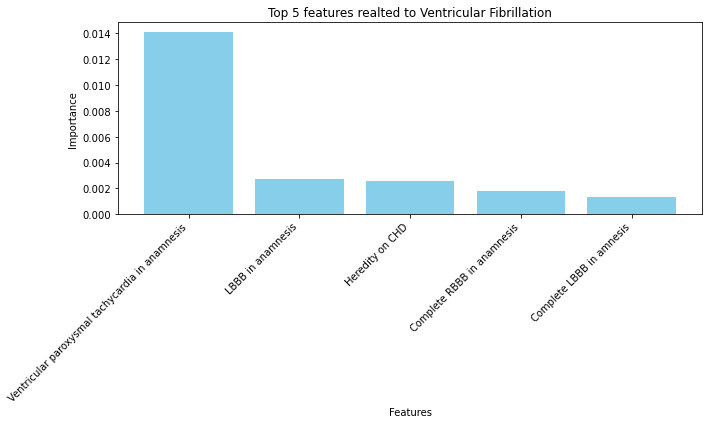

In [ ]:
# Take the top 5 features
top_features10= dict(list(sorted_feature_coefficients10.items())[:5])
print(top_features10)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features10.keys(), top_features10.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Ventricular paroxysmal tachycardia in anamnesis',
                           'LBBB in anamnesis',
                           'Heredity on CHD',
                           'Complete RBBB in anamnesis',
                           'Complete LBBB in amnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred10= svm_classifier10.predict(X_test10)

# Calculate accuracy
accuracy10= accuracy_score(y_test10, y_pred10)
print("Accuracy:", accuracy10)

Accuracy: 0.9176470588235294
